In [2]:
from datascience import *
import numpy as np
import math
import matplotlib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plots
# import pandas as pd
plots.style.use('fivethirtyeight')

In [3]:
# help with EDA:
# https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3

# Help with clustering: 
# https://ds100.org/sp20/syllabus/
# https://www.youtube.com/watch?v=cWBA0HgXFgI
# https://scikit-learn.org/stable/modules/clustering.html

# Help with cleaning data with Pandas:
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

# Data8 datasience module help:
# http://data8.org/sp21/python-reference.html

In [4]:
original_data = Table().read_table("leafly_strain_data.csv")

In [5]:
original_data

name,img_url,type,thc_level,most_common_terpene,description,relaxed,happy,euphoric,uplifted,sleepy,dry_mouth,dry_eyes,dizzy,paranoid,anxious,stress,pain,depression,anxiety,insomnia,hungry,talkative,headache,ptsd,creative,energetic,fatigue,focused,giggly,lack_of_appetite,nausea,headaches,bipolar_disorder,cancer,tingly,cramps,aroused,gastrointestinal_disorder,inflammation,muscle_spasms,eye_pressure,migraines,asthma,anorexia,arthritis,add/adhd,muscular_dystrophy,hypertension,glaucoma,pms,seizures,spasticity,spinal_cord_injury,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus
GG4,https://images.leafly.com/flower-images/gg-4.jpg,Hybrid,20%,Caryophyllene,"Original Glue (GG4), developed by GG Strains, is a poten ...",66%,54%,51%,39%,27%,24%,12%,5%,4%,4%,29%,24%,23%,22%,17%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Wedding Cake,https://images.leafly.com/flower-images/wedding-cake.jpg,Hybrid,22%,Limonene,Wedding Cake is a potent indica-hybrid marijuana strain ...,60%,50%,41%,35%,0%,17%,7%,4%,2%,2%,19%,12%,14%,16%,8%,23%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Runtz,https://images.leafly.com/flower-images/runtz-nug-image.jpg,Hybrid,19%,Limonene,Runtz is a rare hybrid marijuana strain by Cookies. It's ...,47%,62%,48%,43%,0%,9%,4%,3%,0%,1%,13%,7%,11%,11%,0%,0%,31%,1%,6%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Gelato,https://images.leafly.com/flower-images/gelato.jpg,Hybrid,17%,Caryophyllene,"Gelato, aka Larry Bird, is a hybrid marijuana strain mad ...",54%,49%,46%,37%,0%,20%,9%,4%,3%,3%,22%,16%,18%,19%,10%,0%,0%,0%,0%,27%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Blue Dream,https://images.leafly.com/flower-images/blue-dream.png,Hybrid,18%,Myrcene,Blue Dream is a sativa-dominant hybrid marijuana strain ...,48%,57%,52%,48%,0%,29%,16%,6%,6%,0%,36%,26%,27%,29%,13%,0%,0%,3%,0%,37%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Purple Punch,https://images.leafly.com/flower-images/purple-punch-fix ...,Indica,19%,Caryophyllene,Purple Punch is the sweet and sedating union of two indi ...,70%,47%,40%,26%,39%,20%,10%,5%,0%,2%,24%,18%,17%,24%,17%,0%,0%,2%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Ice Cream Cake,nan,Indica,20%,Limonene,Ice Cream Cake is an indica marijuana strain made by cro ...,75%,50%,42%,29%,40%,13%,7%,2%,0%,1%,20%,17%,16%,21%,13%,0%,0%,2%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
GSC,https://images.leafly.com/flower-images/gsc.png,Hybrid,19%,Caryophyllene,"GSC, also called Girl Scout Cookies, is an indica-hybrid ...",55%,60%,52%,45%,0%,25%,13%,5%,4%,4%,33%,25%,26%,25%,13%,0%,0%,0%,0%,33%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
OG Kush,https://images.leafly.com/flower-images/og-kush.png,Hybrid,18%,Myrcene,"OG Kush was first cultivated in Florida, in the early ‘9 ...",52%,56%,50%,38%,0%,34%,20%,7%,7%,0%,38%,27%,24%,28%,20%,30%,0%,4%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Sour Diesel,https://images.leafly.com/flower-images/sour-diesel.jpg,Sativa,18%,Caryophyllene,"Sour Diesel, aka Sour D, is a sativa marijuana strain ma ...",0%,57%,49%,50%,0%,31%,17%,7%,9%,0%,34%,21%,26%,25%,0%,0%,0%,4%,0%,38%,45%,12%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


In [6]:
# for the columns titled with a descreption such as "euphoric" with a percentage as 50%, what this
# means is that 50% of users reported they felt euphoric after using this product
# and for all of the different diseases and symptoms listed with percentages, refers to the percent of users
# that reported this product helped with "nausea" or "cancer" for example

In [7]:
original_data.where("cancer", are.not_equal_to("0%")).where("name", "Jungle Spice")

name,img_url,type,thc_level,most_common_terpene,description,relaxed,happy,euphoric,uplifted,sleepy,dry_mouth,dry_eyes,dizzy,paranoid,anxious,stress,pain,depression,anxiety,insomnia,hungry,talkative,headache,ptsd,creative,energetic,fatigue,focused,giggly,lack_of_appetite,nausea,headaches,bipolar_disorder,cancer,tingly,cramps,aroused,gastrointestinal_disorder,inflammation,muscle_spasms,eye_pressure,migraines,asthma,anorexia,arthritis,add/adhd,muscular_dystrophy,hypertension,glaucoma,pms,seizures,spasticity,spinal_cord_injury,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus
Jungle Spice,nan,Hybrid,18%,Terpinolene,"Celebrating a landrace strain from the Congo, Jungle Spi ...",100%,100%,0%,0%,0%,100%,100%,0%,0%,0%,100%,0%,100%,0%,0%,0%,100%,0%,0%,100%,0%,100%,0%,0%,0%,0%,0%,0%,100%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,100%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


In [8]:
# above is an example of the jungle spice strain which was only review by 1 user,
# and that user said it helped with cancer symptoms, therefore
# the cancer column is 100% 
# I found this out by doing some digging on the websight, because the number of 
# users who responded to a given strain is not included in the original data set

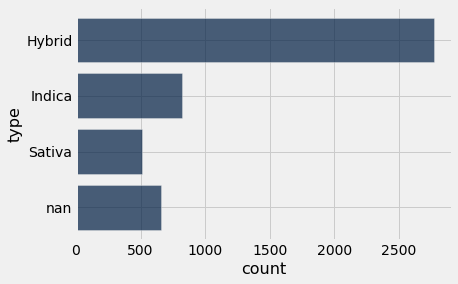

In [9]:
original_data.group("type").barh("type")

In [10]:
number_of_different_strains = len(original_data.column("type"))
number_of_different_strains

4762

In [11]:
table_with_proprtions_of_type = original_data.group("type").with_column("proportion", original_data.group("type").column("count") / number_of_different_strains)
table_with_proprtions_of_type

type,count,proportion
Hybrid,2772,0.582108
Indica,825,0.173247
Sativa,510,0.107098
nan,655,0.137547


In [12]:
sum(table_with_proprtions_of_type.column("proportion"))

0.9999999999999999

In [13]:
terp_groups = original_data.group("most_common_terpene")
terp_groups.sort("count", descending=True)

most_common_terpene,count
nan,2315
Myrcene,1195
Caryophyllene,452
Limonene,371
Terpinolene,302
Pinene,100
Ocimene,16
Linalool,8
Humulene,3


In [14]:
thc_table = original_data.select("thc_level", "name").where("thc_level", are.not_equal_to("nan"))
thc_table

thc_level,name
20%,GG4
22%,Wedding Cake
19%,Runtz
17%,Gelato
18%,Blue Dream
19%,Purple Punch
20%,Ice Cream Cake
19%,GSC
18%,OG Kush
18%,Sour Diesel


In [15]:
# cleaning data, removing % and converting to a int
thc_level_list = list(thc_table.column("thc_level"))
for i in np.arange(len(thc_level_list)):
    thc_level_list[i] = thc_level_list[i].replace("%", "")
    thc_level_list[i] = int(thc_level_list[i])
# thc_level_list

In [16]:
thc_table = thc_table.with_column("thc_level", thc_level_list)
thc_table.sort("thc_level", descending=True)

thc_level,name
34,G13 Widow
33,The Sister
33,Banana Candy
33,Pancake Ice
31,Modified Bananas
31,Confucius Kush
31,Tarmonster
30,Future #1
30,Ebola #7
30,Midnight Mass


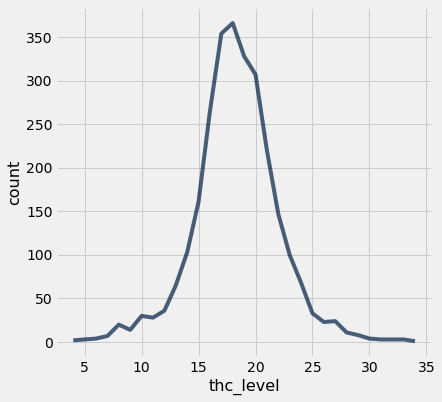

In [17]:
thc_table.group("thc_level").plot("thc_level")

In [18]:
thc_table.group("thc_level").column("thc_level").mean()

19.03448275862069

In [19]:
max(thc_table.group("thc_level").column("thc_level"))

34

In [20]:
thc_table.where("thc_level", 34)

thc_level,name
34,G13 Widow


In [21]:
min(thc_table.group("thc_level").column("thc_level"))

4

In [22]:
thc_table.where("thc_level", 4)

thc_level,name
4,Swiss Gold
4,Lovelace


In [23]:
thc_table_summary = thc_table.group("thc_level").with_column("proportion",thc_table.group("thc_level").column("count") / sum(thc_table.group("thc_level").column("count")) )
thc_table_summary

thc_level,count,proportion
4,2,0.000731261
6,4,0.00146252
7,7,0.00255941
8,20,0.00731261
9,14,0.00511883
10,30,0.0109689
11,28,0.0102377
12,36,0.0131627
13,65,0.023766
14,103,0.03766


In [24]:
original_data.select("euphoric", "uplifted")

euphoric,uplifted
51%,39%
41%,35%
48%,43%
46%,37%
52%,48%
40%,26%
42%,29%
52%,45%
50%,38%
49%,50%


In [25]:
# cleaning data to see if there is a linear relationship between 
# euphoric and uplifting 


euphoric_level_list = list(original_data.column("euphoric"))
for i in np.arange(len(euphoric_level_list)):
    euphoric_level_list[i] = euphoric_level_list[i].replace("%", "")
    euphoric_level_list[i] = int(euphoric_level_list[i])


uplifted_level_list = list(original_data.column("uplifted"))
for i in np.arange(len(uplifted_level_list)):
    uplifted_level_list[i] = uplifted_level_list[i].replace("%", "")
    uplifted_level_list[i] = int(uplifted_level_list[i])
    
uplifted_level_list

original_data = original_data.with_columns("euphoric_int", euphoric_level_list, "uplifted_int", uplifted_level_list )

In [26]:
def cleaning_func_strings_to_int(table,column_name,char_to_replace):
    array_to_list = list(table.column(column_name))
    for i in np.arange(len(array_to_list)):
        if (array_to_list[i] == "nan"):
            array_to_list[i] = None
        else:
            array_to_list[i] = array_to_list[i].replace(char_to_replace, "")
            array_to_list[i] = int(array_to_list[i]) / 100
    return array_to_list
    

In [27]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

## Here I am just cleaning the data, turning all the string values into integers to do calculations on. 

In [28]:
original_data.show(1)

name,img_url,type,thc_level,most_common_terpene,description,relaxed,happy,euphoric,uplifted,sleepy,dry_mouth,dry_eyes,dizzy,paranoid,anxious,stress,pain,depression,anxiety,insomnia,hungry,talkative,headache,ptsd,creative,energetic,fatigue,focused,giggly,lack_of_appetite,nausea,headaches,bipolar_disorder,cancer,tingly,cramps,aroused,gastrointestinal_disorder,inflammation,muscle_spasms,eye_pressure,migraines,asthma,anorexia,arthritis,add/adhd,muscular_dystrophy,hypertension,glaucoma,pms,seizures,spasticity,spinal_cord_injury,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus,euphoric_int,uplifted_int
GG4,https://images.leafly.com/flower-images/gg-4.jpg,Hybrid,20%,Caryophyllene,"Original Glue (GG4), developed by GG Strains, is a poten ...",66%,54%,51%,39%,27%,24%,12%,5%,4%,4%,29%,24%,23%,22%,17%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,51,39


In [29]:
name_and_numerical_data = original_data.drop("img_url", "type", "most_common_terpene", "description")


In [30]:
numerical_column_names_in_original_order = ["thc_level", "relaxed","happy","euphoric", "uplifted","sleepy",
                                                   "dry_mouth", "dry_eyes", "dizzy","paranoid","anxious", "stress",
                                                   "pain", "depression", "anxiety", "insomnia", "hungry", "talkative",
                                                   "headache", "ptsd","creative", "energetic", "fatigue", "focused",
                                                   "giggly", "lack_of_appetite", "nausea", "headaches", "bipolar_disorder",
                                                   "cancer", "tingly", "cramps", "aroused", "gastrointestinal_disorder", 
                                                   "inflammation", "muscle_spasms", "eye_pressure", "migraines", "asthma",
                                                   "anorexia","arthritis", "add/adhd", "muscular_dystrophy", "hypertension",
                                                   "glaucoma", "pms", "seizures", "spasticity", "spinal_cord_injury",
                                                   "fibromyalgia", "crohn's_disease", "phantom_limb_pain", "epilepsy", 
                                                   "multiple_sclerosis", "parkinson's", "tourette's_syndrome", "alzheimer's",
                                                   "hiv/aids", "tinnitus"]

In [31]:
# creating table of only numerical values rather than strings
# each number is a percentage 
for each_column in numerical_column_names_in_original_order:
    new_array = cleaning_func_strings_to_int(name_and_numerical_data,each_column, "%" )
    name_and_numerical_data = name_and_numerical_data.with_column(each_column, new_array)
    
name_and_numerical_data    



name,thc_level,relaxed,happy,euphoric,uplifted,sleepy,dry_mouth,dry_eyes,dizzy,paranoid,anxious,stress,pain,depression,anxiety,insomnia,hungry,talkative,headache,ptsd,creative,energetic,fatigue,focused,giggly,lack_of_appetite,nausea,headaches,bipolar_disorder,cancer,tingly,cramps,aroused,gastrointestinal_disorder,inflammation,muscle_spasms,eye_pressure,migraines,asthma,anorexia,arthritis,add/adhd,muscular_dystrophy,hypertension,glaucoma,pms,seizures,spasticity,spinal_cord_injury,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus,euphoric_int,uplifted_int
GG4,0.2,0.66,0.54,0.51,0.39,0.27,0.24,0.12,0.05,0.04,0.04,0.29,0.24,0.23,0.22,0.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,39
Wedding Cake,0.22,0.6,0.5,0.41,0.35,0,0.17,0.07,0.04,0.02,0.02,0.19,0.12,0.14,0.16,0.08,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,35
Runtz,0.19,0.47,0.62,0.48,0.43,0,0.09,0.04,0.03,0,0.01,0.13,0.07,0.11,0.11,0,0,0.31,0.01,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,43
Gelato,0.17,0.54,0.49,0.46,0.37,0,0.2,0.09,0.04,0.03,0.03,0.22,0.16,0.18,0.19,0.1,0,0,0,0,0.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,37
Blue Dream,0.18,0.48,0.57,0.52,0.48,0,0.29,0.16,0.06,0.06,0,0.36,0.26,0.27,0.29,0.13,0,0,0.03,0,0.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,48
Purple Punch,0.19,0.7,0.47,0.4,0.26,0.39,0.2,0.1,0.05,0,0.02,0.24,0.18,0.17,0.24,0.17,0,0,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,26
Ice Cream Cake,0.2,0.75,0.5,0.42,0.29,0.4,0.13,0.07,0.02,0,0.01,0.2,0.17,0.16,0.21,0.13,0,0,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,29
GSC,0.19,0.55,0.6,0.52,0.45,0,0.25,0.13,0.05,0.04,0.04,0.33,0.25,0.26,0.25,0.13,0,0,0,0,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,45
OG Kush,0.18,0.52,0.56,0.5,0.38,0,0.34,0.2,0.07,0.07,0,0.38,0.27,0.24,0.28,0.2,0.3,0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,38
Sour Diesel,0.18,0,0.57,0.49,0.5,0,0.31,0.17,0.07,0.09,0,0.34,0.21,0.26,0.25,0,0,0,0.04,0,0.38,0.45,0.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,50


In [32]:
all_data_ints_only = name_and_numerical_data.with_columns("img_url",
                                                          original_data.column("img_url"), 
                                                         "type", 
                                                          original_data.column("type"),
                                                         "most_common_terpene", 
                                                          original_data.column("most_common_terpene"),
                                                         "description", 
                                                          original_data.column("description")
                                                         )
all_data_ints_only

name,thc_level,relaxed,happy,euphoric,uplifted,sleepy,dry_mouth,dry_eyes,dizzy,paranoid,anxious,stress,pain,depression,anxiety,insomnia,hungry,talkative,headache,ptsd,creative,energetic,fatigue,focused,giggly,lack_of_appetite,nausea,headaches,bipolar_disorder,cancer,tingly,cramps,aroused,gastrointestinal_disorder,inflammation,muscle_spasms,eye_pressure,migraines,asthma,anorexia,arthritis,add/adhd,muscular_dystrophy,hypertension,glaucoma,pms,seizures,spasticity,spinal_cord_injury,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus,euphoric_int,uplifted_int,img_url,type,most_common_terpene,description
GG4,0.2,0.66,0.54,0.51,0.39,0.27,0.24,0.12,0.05,0.04,0.04,0.29,0.24,0.23,0.22,0.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,39,https://images.leafly.com/flower-images/gg-4.jpg,Hybrid,Caryophyllene,"Original Glue (GG4), developed by GG Strains, is a poten ..."
Wedding Cake,0.22,0.6,0.5,0.41,0.35,0,0.17,0.07,0.04,0.02,0.02,0.19,0.12,0.14,0.16,0.08,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,35,https://images.leafly.com/flower-images/wedding-cake.jpg,Hybrid,Limonene,Wedding Cake is a potent indica-hybrid marijuana strain ...
Runtz,0.19,0.47,0.62,0.48,0.43,0,0.09,0.04,0.03,0,0.01,0.13,0.07,0.11,0.11,0,0,0.31,0.01,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,43,https://images.leafly.com/flower-images/runtz-nug-image.jpg,Hybrid,Limonene,Runtz is a rare hybrid marijuana strain by Cookies. It's ...
Gelato,0.17,0.54,0.49,0.46,0.37,0,0.2,0.09,0.04,0.03,0.03,0.22,0.16,0.18,0.19,0.1,0,0,0,0,0.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,37,https://images.leafly.com/flower-images/gelato.jpg,Hybrid,Caryophyllene,"Gelato, aka Larry Bird, is a hybrid marijuana strain mad ..."
Blue Dream,0.18,0.48,0.57,0.52,0.48,0,0.29,0.16,0.06,0.06,0,0.36,0.26,0.27,0.29,0.13,0,0,0.03,0,0.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,48,https://images.leafly.com/flower-images/blue-dream.png,Hybrid,Myrcene,Blue Dream is a sativa-dominant hybrid marijuana strain ...
Purple Punch,0.19,0.7,0.47,0.4,0.26,0.39,0.2,0.1,0.05,0,0.02,0.24,0.18,0.17,0.24,0.17,0,0,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,26,https://images.leafly.com/flower-images/purple-punch-fix ...,Indica,Caryophyllene,Purple Punch is the sweet and sedating union of two indi ...
Ice Cream Cake,0.2,0.75,0.5,0.42,0.29,0.4,0.13,0.07,0.02,0,0.01,0.2,0.17,0.16,0.21,0.13,0,0,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,29,nan,Indica,Limonene,Ice Cream Cake is an indica marijuana strain made by cro ...
GSC,0.19,0.55,0.6,0.52,0.45,0,0.25,0.13,0.05,0.04,0.04,0.33,0.25,0.26,0.25,0.13,0,0,0,0,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,45,https://images.leafly.com/flower-images/gsc.png,Hybrid,Caryophyllene,"GSC, also called Girl Scout Cookies, is an indica-hybrid ..."
OG Kush,0.18,0.52,0.56,0.5,0.38,0,0.34,0.2,0.07,0.07,0,0.38,0.27,0.24,0.28,0.2,0.3,0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,38,https://images.leafly.com/flower-images/og-kush.png,Hybrid,Myrcene,"OG Kush was first cultivated in Florida, in the early ‘9 ..."
Sour Diesel,0.18,0,0.57,0.49,0.5,0,0.31,0.17,0.07,0.09,0,0.34,0.21,0.26,0.25,0,0,0,0.04,0,0.38,0.45,0.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,50,https://images.leafly.com/flower-images/sour-diesel.jpg,Sativa,Caryophyllene,"Sour Diesel, aka Sour D, is a sativa marijuana strain ma ..."


In [33]:
all_data_ints_only_binary_test = all_data_ints_only.with_column("Indica", all_data_ints_only.column("type"))

In [34]:
indica_type_array = all_data_ints_only.column("type")
indica_binary_array = []
def keyword_checker_binary_Indica(current_string):
    if ("Indica" in current_string):
        return 1
    else:
        return 0
    
def keyword_checker_binary_Sativa(current_string):
    if ("Sativa" in current_string):
        return 1
    else:
        return 0
    
    
def keyword_checker_binary_Hybrid(current_string):
    if ("Hybrid" in current_string):
        return 1
    else:
        return 0
    
def keyword_checker_binary_nan(current_string):
    if ("nan" in current_string):
        return 1
    else:
        return 0
      
all_data_ints_only_binary_test = all_data_ints_only.with_column("Indica", all_data_ints_only.column("type"))
all_data_ints_only_binary_test = all_data_ints_only_binary_test.with_column("Sativa", all_data_ints_only.column("type"))
all_data_ints_only_binary_test = all_data_ints_only_binary_test.with_column("Hybrid", all_data_ints_only.column("type"))
all_data_ints_only_binary_test


name,thc_level,relaxed,happy,euphoric,uplifted,sleepy,dry_mouth,dry_eyes,dizzy,paranoid,anxious,stress,pain,depression,anxiety,insomnia,hungry,talkative,headache,ptsd,creative,energetic,fatigue,focused,giggly,lack_of_appetite,nausea,headaches,bipolar_disorder,cancer,tingly,cramps,aroused,gastrointestinal_disorder,inflammation,muscle_spasms,eye_pressure,migraines,asthma,anorexia,arthritis,add/adhd,muscular_dystrophy,hypertension,glaucoma,pms,seizures,spasticity,spinal_cord_injury,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus,euphoric_int,uplifted_int,img_url,type,most_common_terpene,description,Indica,Sativa,Hybrid
GG4,0.2,0.66,0.54,0.51,0.39,0.27,0.24,0.12,0.05,0.04,0.04,0.29,0.24,0.23,0.22,0.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,39,https://images.leafly.com/flower-images/gg-4.jpg,Hybrid,Caryophyllene,"Original Glue (GG4), developed by GG Strains, is a poten ...",Hybrid,Hybrid,Hybrid
Wedding Cake,0.22,0.6,0.5,0.41,0.35,0,0.17,0.07,0.04,0.02,0.02,0.19,0.12,0.14,0.16,0.08,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,35,https://images.leafly.com/flower-images/wedding-cake.jpg,Hybrid,Limonene,Wedding Cake is a potent indica-hybrid marijuana strain ...,Hybrid,Hybrid,Hybrid
Runtz,0.19,0.47,0.62,0.48,0.43,0,0.09,0.04,0.03,0,0.01,0.13,0.07,0.11,0.11,0,0,0.31,0.01,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,43,https://images.leafly.com/flower-images/runtz-nug-image.jpg,Hybrid,Limonene,Runtz is a rare hybrid marijuana strain by Cookies. It's ...,Hybrid,Hybrid,Hybrid
Gelato,0.17,0.54,0.49,0.46,0.37,0,0.2,0.09,0.04,0.03,0.03,0.22,0.16,0.18,0.19,0.1,0,0,0,0,0.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,37,https://images.leafly.com/flower-images/gelato.jpg,Hybrid,Caryophyllene,"Gelato, aka Larry Bird, is a hybrid marijuana strain mad ...",Hybrid,Hybrid,Hybrid
Blue Dream,0.18,0.48,0.57,0.52,0.48,0,0.29,0.16,0.06,0.06,0,0.36,0.26,0.27,0.29,0.13,0,0,0.03,0,0.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,48,https://images.leafly.com/flower-images/blue-dream.png,Hybrid,Myrcene,Blue Dream is a sativa-dominant hybrid marijuana strain ...,Hybrid,Hybrid,Hybrid
Purple Punch,0.19,0.7,0.47,0.4,0.26,0.39,0.2,0.1,0.05,0,0.02,0.24,0.18,0.17,0.24,0.17,0,0,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,26,https://images.leafly.com/flower-images/purple-punch-fix ...,Indica,Caryophyllene,Purple Punch is the sweet and sedating union of two indi ...,Indica,Indica,Indica
Ice Cream Cake,0.2,0.75,0.5,0.42,0.29,0.4,0.13,0.07,0.02,0,0.01,0.2,0.17,0.16,0.21,0.13,0,0,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,29,nan,Indica,Limonene,Ice Cream Cake is an indica marijuana strain made by cro ...,Indica,Indica,Indica
GSC,0.19,0.55,0.6,0.52,0.45,0,0.25,0.13,0.05,0.04,0.04,0.33,0.25,0.26,0.25,0.13,0,0,0,0,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,45,https://images.leafly.com/flower-images/gsc.png,Hybrid,Caryophyllene,"GSC, also called Girl Scout Cookies, is an indica-hybrid ...",Hybrid,Hybrid,Hybrid
OG Kush,0.18,0.52,0.56,0.5,0.38,0,0.34,0.2,0.07,0.07,0,0.38,0.27,0.24,0.28,0.2,0.3,0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,38,https://images.leafly.com/flower-images/og-kush.png,Hybrid,Myrcene,"OG Kush was first cultivated in Florida, in the early ‘9 ...",Hybrid,Hybrid,Hybrid
Sour Diesel,0.18,0,0.57,0.49,0.5,0,0.31,0.17,0.07,0.09,0,0.34,0.21,0.26,0.25,0,0,0,0.04,0,0.38,0.45,0.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,50,https://images.leafly.com/flower-images/sour-diesel.jpg,Sativa,Caryophyllene,"Sour Diesel, aka Sour D, is a sativa marijuana strain ma ...",Sativa,Sat

## Here I am adding numerical values for the classes "Hybrid, Sativa, and Indica"

In [35]:
Indica_binary_array = all_data_ints_only_binary_test.apply(keyword_checker_binary_Indica, "Indica")
Sativa_binary_array = all_data_ints_only_binary_test.apply(keyword_checker_binary_Sativa, "Sativa")
Hybrid_binary_array = all_data_ints_only_binary_test.apply(keyword_checker_binary_Hybrid, "Hybrid")
data_with_binary_values = all_data_ints_only_binary_test.with_columns("Indica", Indica_binary_array, "Sativa", Sativa_binary_array, "Hybrid", Hybrid_binary_array)

## This table of averages represents the average value of each column grouped by type

In [36]:
averaged_data_type = all_data_ints_only.where("type", are.not_equal_to("nan"))
averaged_data_type = averaged_data_type.group("type", np.average)
averaged_data_type


type,name average,thc_level average,relaxed average,happy average,euphoric average,uplifted average,sleepy average,dry_mouth average,dry_eyes average,dizzy average,paranoid average,anxious average,stress average,pain average,depression average,anxiety average,insomnia average,hungry average,talkative average,headache average,ptsd average,creative average,energetic average,fatigue average,focused average,giggly average,lack_of_appetite average,nausea average,headaches average,bipolar_disorder average,cancer average,tingly average,cramps average,aroused average,gastrointestinal_disorder average,inflammation average,muscle_spasms average,eye_pressure average,migraines average,asthma average,anorexia average,arthritis average,add/adhd average,muscular_dystrophy average,hypertension average,glaucoma average,pms average,seizures average,spasticity average,spinal_cord_injury average,fibromyalgia average,crohn's_disease average,phantom_limb_pain average,epilepsy average,multiple_sclerosis average,parkinson's average,tourette's_syndrome average,alzheimer's average,hiv/aids average,tinnitus average,euphoric_int average,uplifted_int average,img_url average,most_common_terpene average,description average
Hybrid,,None,0.353918,0.340786,0.262323,0.268806,0.0630339,0.138687,0.0767857,0.0306313,0.0205014,0.0233189,0.188081,0.13938,0.154188,0.13268,0.0564935,0.0629076,0.0533081,0.0154004,0.0158947,0.090184,0.068676,0.0401046,0.084697,0.0370058,0.0351154,0.0205159,0.0341089,0.00563131,0.00130952,0.0479654,0.0113889,0.0119769,0.00155844,0.026746,0.0176407,0.00930736,0.00588745,0.000873016,0.000523088,0.00656926,0.0141558,5.05051e-05,0.00148629,0.00049062,0.00205267,0.00159091,0.00253247,0.000234488,0.00137446,0.000501443,0.000147908,0.000966811,0.00101732,0.000119048,0,0.000811688,0.000180375,0,26.2323,26.8806,,,
Indica,,None,0.624691,0.429139,0.358327,0.230097,0.313055,0.232109,0.134885,0.0514182,0.0309697,0.0250545,0.300158,0.257794,0.190533,0.20463,0.206121,0.125927,0.0267758,0.0243515,0.0156727,0.0404848,0.0154061,0.0223152,0.0421455,0.0368606,0.0460848,0.0173697,0.0377212,0.00255758,0.0016,0.0481818,0.0154061,0.0147879,0.0004,0.0315152,0.0278909,0.0125939,0.00844848,0.000824242,0.000472727,0.0041697,0.0146545,0,0.00242424,0,0.00187879,0.00181818,0.00310303,0.000436364,0.000727273,0.0013697,0,0.00242424,0,0.0004,0.0004,0.000169697,0.0004,0.00121212,35.8327,23.0097,,,
Sativa,,None,0.238725,0.503961,0.360922,0.465392,0.0133333,0.203451,0.112961,0.0431373,0.041,0.0385686,0.284196,0.147392,0.248686,0.166196,0.020902,0.0288431,0.072451,0.0268627,0.0140784,0.189647,0.340922,0.112941,0.177745,0.0324314,0.0472157,0.0312941,0.037098,0.00762745,0,0.032902,0.0085098,0.013,0.000490196,0.0233725,0.0101961,0.011451,0.00721569,0.000254902,0.00235294,0.00235294,0.022451,0,0.000901961,0.00027451,0.00152941,0.000313725,0.000137255,0.000235294,0.000392157,0,0.000647059,0,0.000980392,0,0.000392157,0,0,0,36.0922,46.5392,,,


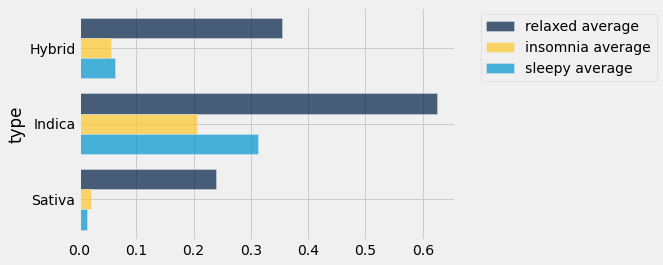

In [37]:
averaged_data_type.select("type", "relaxed average", "insomnia average", "sleepy average").barh("type")

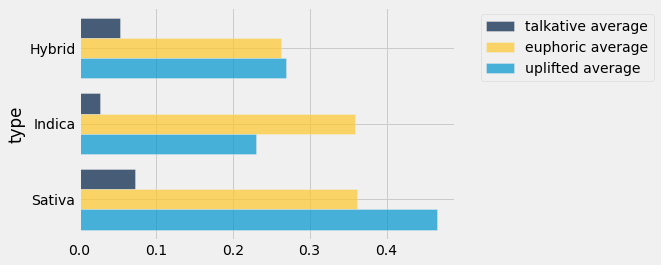

In [38]:
averaged_data_type.select("type", "talkative average", "euphoric average", "uplifted average").barh("type")

In [39]:
disease_and_symptom_data = all_data_ints_only.select("name", "most_common_terpene", "description","thc_level", "type", "nausea", "headaches", "bipolar_disorder",
                                                   "cancer", "cramps", "gastrointestinal_disorder", 
                                                   "inflammation", "muscle_spasms", "eye_pressure", "migraines", "asthma",
                                                   "anorexia","arthritis", "add/adhd", "muscular_dystrophy", "hypertension",
                                                   "glaucoma", "pms", "seizures", "spasticity", "spinal_cord_injury",
                                                   "fibromyalgia", "crohn's_disease", "phantom_limb_pain", "epilepsy", 
                                                   "multiple_sclerosis", "parkinson's", "tourette's_syndrome", "alzheimer's",
                                                   "hiv/aids", "tinnitus")
disease_and_symptom_data = disease_and_symptom_data.where("type", are.not_equal_to("nan"))
disease_and_symptom_data

name,most_common_terpene,description,thc_level,type,nausea,headaches,bipolar_disorder,cancer,cramps,gastrointestinal_disorder,inflammation,muscle_spasms,eye_pressure,migraines,asthma,anorexia,arthritis,add/adhd,muscular_dystrophy,hypertension,glaucoma,pms,seizures,spasticity,spinal_cord_injury,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus
GG4,Caryophyllene,"Original Glue (GG4), developed by GG Strains, is a poten ...",0.2,Hybrid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wedding Cake,Limonene,Wedding Cake is a potent indica-hybrid marijuana strain ...,0.22,Hybrid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Runtz,Limonene,Runtz is a rare hybrid marijuana strain by Cookies. It's ...,0.19,Hybrid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gelato,Caryophyllene,"Gelato, aka Larry Bird, is a hybrid marijuana strain mad ...",0.17,Hybrid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Blue Dream,Myrcene,Blue Dream is a sativa-dominant hybrid marijuana strain ...,0.18,Hybrid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Purple Punch,Caryophyllene,Purple Punch is the sweet and sedating union of two indi ...,0.19,Indica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ice Cream Cake,Limonene,Ice Cream Cake is an indica marijuana strain made by cro ...,0.2,Indica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GSC,Caryophyllene,"GSC, also called Girl Scout Cookies, is an indica-hybrid ...",0.19,Hybrid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OG Kush,Myrcene,"OG Kush was first cultivated in Florida, in the early ‘9 ...",0.18,Hybrid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sour Diesel,Caryophyllene,"Sour Diesel, aka Sour D, is a sativa marijuana strain ma ...",0.18,Sativa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Now I begin to explore the relationships with strains that have been reported to help with seizures 

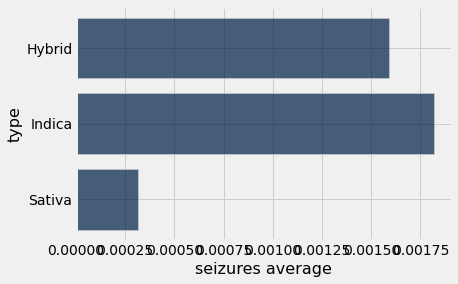

In [40]:
averaged_data_type.select("type", "seizures average").barh("type")

In [41]:
# exporing what strains are most popular for helping with seizures

highest_recomended_strains_for_seizures = disease_and_symptom_data.select("seizures", "type","most_common_terpene", "name","thc_level", "description")
highest_recomended_strains_for_seizures = highest_recomended_strains_for_seizures.where("seizures", are.not_equal_to(0))
# highest_recomended_strains_for_seizures = highest_recomended_strains_for_seizures.where("seizures", are.not_equal_to(1))
highest_recomended_strains_for_seizures = highest_recomended_strains_for_seizures.sort("seizures", descending=True)
highest_recomended_strains_for_seizures

seizures,type,most_common_terpene,name,thc_level,description
1,Indica,nan,Athabasca,None,Athabasca is a variety of the strain Pennywise grown by ...
1,Hybrid,nan,Thai Fantasy,None,Thai Fantasy by Kannabia Seed Company is a sativa-domina ...
1,Hybrid,nan,Face Off Bx2,None,"A new take on an old classic, Archive Seed Bank’s Face O ..."
0.5,Hybrid,Caryophyllene,Grandma Anderson’s Cookies,0.21,"Bred by Humboldt’s Redwood Roots Family, Grandma Anderso ..."
0.5,Indica,Myrcene,Mud Bite,0.16,There is a very little known about Mud Bite. This strain ...
0.44,Hybrid,nan,GI001,None,GI001 is a sativa-dominant cannabis strain developed by ...
0.4,Hybrid,nan,Mighty Glue,None,"Cultivated by The Farm Genetics, Mighty Glue was develop ..."
0.25,Hybrid,Myrcene,Maui Pineapple Chunk,0.2,Maui Pineapple Chunk is a 50/50 hybrid bred by Pua Mana ...
0.25,Hybrid,nan,Early Miss,None,"An auto-flowering indica-dominant hybrid, Early Miss is ..."
0.22,Hybrid,nan,Marcosus Marshmellow,None,Marcosus Marshmellow is a Girl Scout Cookies phenotype g ...


In [42]:
highest_recomended_strains_for_seizures.group("most_common_terpene")

most_common_terpene,count
Caryophyllene,1
Myrcene,3
Terpinolene,2
nan,8


In [43]:
def hybrid_dominant_strain_simple(description_string):
#     returns the "score" of how many times the strain is mentioned to be
# indica sativa, indica dominant or sativa dominant
    indica_score = 0
    sativa_score = 0
    cbd_score = 0
    if ("indica-dominant" in description_string):
        indica_score += 2
    if ("indica dominant" in description_string):
        indica_score +=2
    if ("indica" in description_string):
        indica_score +=1
    if ("sativa-dominant" in description_string):
        sativa_score +=2
    if ("sativa dominant" in description_string):
        sativa_score +=2   
    if ("sativa" in description_string):
        sativa_score +=1 
    if ("CBD dominant" in description_string):
        return "High CBD"
    if ("CBD 1:1" in description_string):
        return "High CBD"
    if ("high CBD" in description_string):
        return "High CBD"
    if (indica_score > sativa_score):
        return ("Indica Dominant")
    if (sativa_score > indica_score):
        return ("Sativa Dominant")  
    else:
        return "NA"
    
        
# hybrid_dominant_strain_simple(Mud_Bite_string)

In [44]:
# move project to cloud use another notebook AWS google 
# Clustering based off data 100 lectures + article 
# 

In [45]:
seizure_dominant_array = highest_recomended_strains_for_seizures.apply(hybrid_dominant_strain_simple, "description")

In [46]:
highest_recomended_strains_for_seizures = highest_recomended_strains_for_seizures.with_column("dominant_strain", seizure_dominant_array)
highest_recomended_strains_for_seizures = highest_recomended_strains_for_seizures.drop("Dominant Strain").drop("dominant strain")
highest_recomended_strains_for_seizures.show()

seizures,type,most_common_terpene,name,thc_level,description,dominant_strain
1,Indica,nan,Athabasca,None,Athabasca is a variety of the strain Pennywise grown by ...,NA
1,Hybrid,nan,Thai Fantasy,None,Thai Fantasy by Kannabia Seed Company is a sativa-domina ...,Sativa Dominant
1,Hybrid,nan,Face Off Bx2,None,"A new take on an old classic, Archive Seed Bank’s Face O ...",NA
0.5,Hybrid,Caryophyllene,Grandma Anderson’s Cookies,0.21,"Bred by Humboldt’s Redwood Roots Family, Grandma Anderso ...",Indica Dominant
0.5,Indica,Myrcene,Mud Bite,0.16,There is a very little known about Mud Bite. This strain ...,Indica Dominant
0.44,Hybrid,nan,GI001,None,GI001 is a sativa-dominant cannabis strain developed by ...,Sativa Dominant
0.4,Hybrid,nan,Mighty Glue,None,"Cultivated by The Farm Genetics, Mighty Glue was develop ...",NA
0.25,Hybrid,Myrcene,Maui Pineapple Chunk,0.2,Maui Pineapple Chunk is a 50/50 hybrid bred by Pua Mana ...,NA
0.25,Hybrid,nan,Early Miss,None,"An auto-flowering indica-dominant hybrid, Early Miss is ...",Indica Dominant
0.22,Hybrid,nan,Marcosus Marshmellow,None,Marcosus Marshmellow is a Girl Scout Cookies phenotype g ...,NA


In [47]:
# this table bellow shows that Hybrid Strains are the most recomended 
# for seizures 
highest_recomended_strains_for_seizures_porportions = highest_recomended_strains_for_seizures.group(["type", "dominant_strain"])
porportions_array = highest_recomended_strains_for_seizures_porportions.column("count") / 11
highest_recomended_strains_for_seizures_porportions = highest_recomended_strains_for_seizures_porportions.with_column("porportions", porportions_array)
highest_recomended_strains_for_seizures_porportions.sort("porportions", descending=True)

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


type,dominant_strain,count,porportions
Hybrid,NA,7,0.636364
Hybrid,Indica Dominant,2,0.181818
Hybrid,Sativa Dominant,2,0.181818
Indica,Indica Dominant,1,0.0909091
Indica,NA,1,0.0909091
Sativa,NA,1,0.0909091


In [48]:
names_seizure = disease_and_symptom_data.column("name")

In [49]:
correlation_seizures_relaxed = all_data_ints_only.where("seizures", are.not_equal_to(0)).where("seizures", are.not_equal_to(100)).select("seizures", "relaxed")
correlation_seizures_relaxed

seizures,relaxed
0.1,0.4
0.25,0
0.22,0.55
0.44,0
0.16,0.5
0.16,0.33
0.5,0.5
0.25,0.5
0.4,0
0.5,1


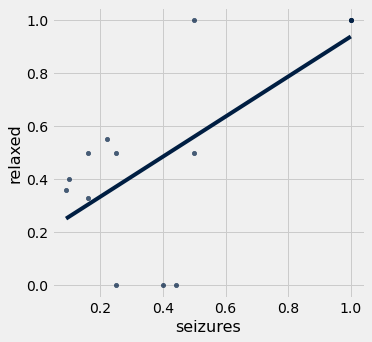

In [50]:
correlation_seizures_relaxed.scatter("seizures", fit_line=True)

In [51]:
correlation(correlation_seizures_relaxed, "seizures", "relaxed")

0.6790778857375356

In [52]:
highest_recomended_strains_for_seizures.column("description").item(8)

'An auto-flowering indica-dominant hybrid, Early Miss is a great strain for those looking for pain relief or an appetite boost. Crop King Seeds took the heavy producer Big Bud and paired it with the hard-hitting White Widow to make a moderate yielding plant with high levels of THC, and then crossed it with an auto-flowering ruderalis variety. Flowering in 50 days, this hybrid is a quick and easy grow that will not leave you disappointed.'

In [53]:
averaged_data_type

type,name average,thc_level average,relaxed average,happy average,euphoric average,uplifted average,sleepy average,dry_mouth average,dry_eyes average,dizzy average,paranoid average,anxious average,stress average,pain average,depression average,anxiety average,insomnia average,hungry average,talkative average,headache average,ptsd average,creative average,energetic average,fatigue average,focused average,giggly average,lack_of_appetite average,nausea average,headaches average,bipolar_disorder average,cancer average,tingly average,cramps average,aroused average,gastrointestinal_disorder average,inflammation average,muscle_spasms average,eye_pressure average,migraines average,asthma average,anorexia average,arthritis average,add/adhd average,muscular_dystrophy average,hypertension average,glaucoma average,pms average,seizures average,spasticity average,spinal_cord_injury average,fibromyalgia average,crohn's_disease average,phantom_limb_pain average,epilepsy average,multiple_sclerosis average,parkinson's average,tourette's_syndrome average,alzheimer's average,hiv/aids average,tinnitus average,euphoric_int average,uplifted_int average,img_url average,most_common_terpene average,description average
Hybrid,,None,0.353918,0.340786,0.262323,0.268806,0.0630339,0.138687,0.0767857,0.0306313,0.0205014,0.0233189,0.188081,0.13938,0.154188,0.13268,0.0564935,0.0629076,0.0533081,0.0154004,0.0158947,0.090184,0.068676,0.0401046,0.084697,0.0370058,0.0351154,0.0205159,0.0341089,0.00563131,0.00130952,0.0479654,0.0113889,0.0119769,0.00155844,0.026746,0.0176407,0.00930736,0.00588745,0.000873016,0.000523088,0.00656926,0.0141558,5.05051e-05,0.00148629,0.00049062,0.00205267,0.00159091,0.00253247,0.000234488,0.00137446,0.000501443,0.000147908,0.000966811,0.00101732,0.000119048,0,0.000811688,0.000180375,0,26.2323,26.8806,,,
Indica,,None,0.624691,0.429139,0.358327,0.230097,0.313055,0.232109,0.134885,0.0514182,0.0309697,0.0250545,0.300158,0.257794,0.190533,0.20463,0.206121,0.125927,0.0267758,0.0243515,0.0156727,0.0404848,0.0154061,0.0223152,0.0421455,0.0368606,0.0460848,0.0173697,0.0377212,0.00255758,0.0016,0.0481818,0.0154061,0.0147879,0.0004,0.0315152,0.0278909,0.0125939,0.00844848,0.000824242,0.000472727,0.0041697,0.0146545,0,0.00242424,0,0.00187879,0.00181818,0.00310303,0.000436364,0.000727273,0.0013697,0,0.00242424,0,0.0004,0.0004,0.000169697,0.0004,0.00121212,35.8327,23.0097,,,
Sativa,,None,0.238725,0.503961,0.360922,0.465392,0.0133333,0.203451,0.112961,0.0431373,0.041,0.0385686,0.284196,0.147392,0.248686,0.166196,0.020902,0.0288431,0.072451,0.0268627,0.0140784,0.189647,0.340922,0.112941,0.177745,0.0324314,0.0472157,0.0312941,0.037098,0.00762745,0,0.032902,0.0085098,0.013,0.000490196,0.0233725,0.0101961,0.011451,0.00721569,0.000254902,0.00235294,0.00235294,0.022451,0,0.000901961,0.00027451,0.00152941,0.000313725,0.000137255,0.000235294,0.000392157,0,0.000647059,0,0.000980392,0,0.000392157,0,0,0,36.0922,46.5392,,,


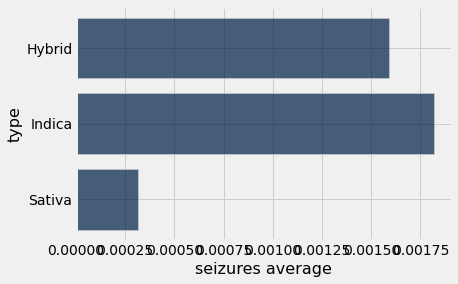

In [54]:
averaged_data_type.select("type", "seizures average").barh("type")

In [55]:
names_seizures = highest_recomended_strains_for_seizures.column("name")
names_seizures

array(['Athabasca', 'Thai Fantasy', 'Face Off Bx2',
       'Grandma Anderson’s Cookies', 'Mud Bite', 'GI001', 'Mighty Glue',
       'Maui Pineapple Chunk', 'Early Miss', 'Marcosus Marshmellow',
       'Southern Lights', 'Gremlin', 'Chili Verde', 'Dreamer’s Glass'],
      dtype='<U30')

## Analysis on popular types/ strains for seizure patients: 

### There was a strong posotive correlation of .67 with strains that users reported to help with relaxation 
### to also help with seizures. 

### Hybrids have been reported the most for helping with seizures with 11/14 strains reported to help with seizures being Hybrids.

### The next most common is Indica with 2 / 11 pure Indicas and 2 / 11 Indica dominant hybrids. 

### Sativa is the least common with 1 / 11 pure Sativas and 2 / 11 Sativa dominant hybrids. 



In [56]:
most_relaxing_strains = all_data_ints_only.sort("relaxed", descending=True).where("relaxed", are.not_equal_to(1)).select("name", "most_common_terpene", "relaxed", "type", "description")
most_relaxing_strains

name,most_common_terpene,relaxed,type,description
Jawa Pie,nan,0.95,Indica,Jawa Pie is a sumptuously minty cut by Ocean Grown Seeds ...
Ken's Kush,Limonene,0.95,Hybrid,Ken’s Kush is a potent hybrid cannabis strain bred by Ke ...
Money Maker,Terpinolene,0.94,Indica,Money Maker is a blend of three of the finest old school ...
The OX,nan,0.94,Indica,Rare Dankness created their own version of Bubba Kush by ...
Bubba's Gift,Limonene,0.93,Indica,"Developed by Humboldt Seed Organization, Bubba’s Gift is ..."
Brandywine,Limonene,0.92,Indica,Brandywine by Dungeons Vault Genetics is a pleasant indi ...
Mataro Blue,Myrcene,0.92,Indica,Mataro Blue by Kannabia Seeds is a rare three-way cross ...
Triple Cheese,Myrcene,0.92,Indica,"One cheese, two cheese, Old Cheese crossed with Blue Che ..."
Alpha OG,Limonene,0.92,Hybrid,Alpha OG from Alpha Medic is an OG Kush phenotype that t ...
CBD Blue Shark,Myrcene,0.92,Hybrid,CBD Blue Shark by Barney’s Farm is a flavorful 1:1 CBD/T ...


In [57]:
most_relaxing_strains.group("most_common_terpene").sort("count", descending=True)

most_common_terpene,count
nan,2150
Myrcene,1153
Caryophyllene,431
Limonene,350
Terpinolene,284
Pinene,95
Ocimene,14
Linalool,8
Humulene,3


In [58]:
dominant_type_array = most_relaxing_strains.apply(hybrid_dominant_strain_simple, "description")

In [59]:
most_relaxing_strains.with_column("dominant_type", dominant_type_array).show()

name,most_common_terpene,relaxed,type,description,dominant_type
Jawa Pie,nan,0.95,Indica,Jawa Pie is a sumptuously minty cut by Ocean Grown Seeds ...,Indica Dominant
Ken's Kush,Limonene,0.95,Hybrid,Ken’s Kush is a potent hybrid cannabis strain bred by Ke ...,Indica Dominant
Money Maker,Terpinolene,0.94,Indica,Money Maker is a blend of three of the finest old school ...,Indica Dominant
The OX,nan,0.94,Indica,Rare Dankness created their own version of Bubba Kush by ...,High CBD
Bubba's Gift,Limonene,0.93,Indica,"Developed by Humboldt Seed Organization, Bubba’s Gift is ...",Indica Dominant
Brandywine,Limonene,0.92,Indica,Brandywine by Dungeons Vault Genetics is a pleasant indi ...,Indica Dominant
Mataro Blue,Myrcene,0.92,Indica,Mataro Blue by Kannabia Seeds is a rare three-way cross ...,Indica Dominant
Triple Cheese,Myrcene,0.92,Indica,"One cheese, two cheese, Old Cheese crossed with Blue Che ...",NA
Alpha OG,Limonene,0.92,Hybrid,Alpha OG from Alpha Medic is an OG Kush phenotype that t ...,NA
CBD Blue Shark,Myrcene,0.92,Hybrid,CBD Blue Shark by Barney’s Farm is a flavorful 1:1 CBD/T ...,NA


In [60]:
# the highest recomnded strain for seizures is above, and from looking at the descrition we could find
# that it is indicap dominant, with one of its parents coming from GSC or girl scout cookies. 

# we can see the 2nd top "mud bite" is also indica dominant

In [61]:
# intrestingly the strain GI001 is a predomnatly CBD strain with a CBD to THC ratio 24:1

In [62]:
original_data.select("name", "description").where("name", "Mighty Glue").column("description")

array(['Cultivated by The Farm Genetics, Mighty Glue was developed to be a tried-and-true, heavy-hitting nightcap. Created by crossing OG Glue with Sour Bubble, Mighty Glue produces dense trichome-soaked buds that smell of sharp, sour funk and sandalwood incense. This strain will make you laugh and let go of the day before stepping into bed.'],
      dtype='<U1132')

In [63]:
disease_and_symptom_data.group("type", np.average)

type,name average,most_common_terpene average,description average,thc_level average,nausea average,headaches average,bipolar_disorder average,cancer average,cramps average,gastrointestinal_disorder average,inflammation average,muscle_spasms average,eye_pressure average,migraines average,asthma average,anorexia average,arthritis average,add/adhd average,muscular_dystrophy average,hypertension average,glaucoma average,pms average,seizures average,spasticity average,spinal_cord_injury average,fibromyalgia average,crohn's_disease average,phantom_limb_pain average,epilepsy average,multiple_sclerosis average,parkinson's average,tourette's_syndrome average,alzheimer's average,hiv/aids average,tinnitus average
Hybrid,,,,None,0.0205159,0.0341089,0.00563131,0.00130952,0.0113889,0.00155844,0.026746,0.0176407,0.00930736,0.00588745,0.000873016,0.000523088,0.00656926,0.0141558,5.05051e-05,0.00148629,0.00049062,0.00205267,0.00159091,0.00253247,0.000234488,0.00137446,0.000501443,0.000147908,0.000966811,0.00101732,0.000119048,0,0.000811688,0.000180375,0
Indica,,,,None,0.0173697,0.0377212,0.00255758,0.0016,0.0154061,0.0004,0.0315152,0.0278909,0.0125939,0.00844848,0.000824242,0.000472727,0.0041697,0.0146545,0,0.00242424,0,0.00187879,0.00181818,0.00310303,0.000436364,0.000727273,0.0013697,0,0.00242424,0,0.0004,0.0004,0.000169697,0.0004,0.00121212
Sativa,,,,None,0.0312941,0.037098,0.00762745,0,0.0085098,0.000490196,0.0233725,0.0101961,0.011451,0.00721569,0.000254902,0.00235294,0.00235294,0.022451,0,0.000901961,0.00027451,0.00152941,0.000313725,0.000137255,0.000235294,0.000392157,0,0.000647059,0,0.000980392,0,0.000392157,0,0,0


In [64]:
# cancer_hybrid_dominance = highest_recomended_strains_for_cancer.apply(hybrid_dominant_strain_simple, "description" )

In [65]:
# highest_recomended_strains_for_cancer.with_column("Dominant Strain", cancer_hybrid_dominance)

In [66]:
highest_recomended_strains_for_epilepsy = disease_and_symptom_data.select("epilepsy", "type","name","thc_level", "description")
highest_recomended_strains_for_epilepsy = highest_recomended_strains_for_epilepsy.where("epilepsy", are.not_equal_to(0))
highest_recomended_strains_for_epilepsy = highest_recomended_strains_for_epilepsy.where("epilepsy", are.not_equal_to(100))
highest_recomended_strains_for_epilepsy = highest_recomended_strains_for_epilepsy.sort("epilepsy", descending=True)

dominant_list_epilepsy = highest_recomended_strains_for_epilepsy.apply(hybrid_dominant_strain_simple, "description")

highest_recomended_strains_for_epilepsy = highest_recomended_strains_for_epilepsy.with_column("dominant_strain",dominant_list_epilepsy)
highest_recomended_strains_for_epilepsy

epilepsy,type,name,thc_level,description,dominant_strain
1,Indica,Athabasca,None,Athabasca is a variety of the strain Pennywise grown by ...,NA
1,Indica,JT15,None,JT15 is an indica Kush cross with a powerful onset and a ...,Indica Dominant
0.5,Hybrid,Dutch 47,0.19,"Bred by Washington’s Trail Blazin’, Dutch 47 is a cross ...",NA
0.5,Hybrid,Mauna Kea White Fire OG,None,"Bred by Pua Mana 1st Hawaiian Pakalolo Seed Bank, Mauna ...",NA
0.5,Hybrid,Diamond Socks,None,"Diamond Socks, named for the dense layer of trichomes co ...",Indica Dominant
0.44,Hybrid,GI001,None,GI001 is a sativa-dominant cannabis strain developed by ...,Sativa Dominant
0.33,Hybrid,Gremlin,0.15,A cross between King Louis XIII and Mogwai (White Fire A ...,NA
0.25,Hybrid,Early Miss,None,"An auto-flowering indica-dominant hybrid, Early Miss is ...",Indica Dominant
0.16,Hybrid,Orient Express,0.18,Orient Express by Ace Seeds is a sativa-dominant hybrid ...,Sativa Dominant


In [67]:
data_with_binary_values.where("seizures", are.not_equal_to(0))

name,thc_level,relaxed,happy,euphoric,uplifted,sleepy,dry_mouth,dry_eyes,dizzy,paranoid,anxious,stress,pain,depression,anxiety,insomnia,hungry,talkative,headache,ptsd,creative,energetic,fatigue,focused,giggly,lack_of_appetite,nausea,headaches,bipolar_disorder,cancer,tingly,cramps,aroused,gastrointestinal_disorder,inflammation,muscle_spasms,eye_pressure,migraines,asthma,anorexia,arthritis,add/adhd,muscular_dystrophy,hypertension,glaucoma,pms,seizures,spasticity,spinal_cord_injury,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus,euphoric_int,uplifted_int,img_url,type,most_common_terpene,description,Indica,Sativa,Hybrid
Chili Verde,0.21,0.4,0.3,0.5,0,0,0,0.1,0.1,0,0,0.1,0.1,0,0,0,0.3,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,50,0,nan,Hybrid,Terpinolene,Chili Verde is a hybrid marijuana strain. We’re still le ...,0,0,1
Maui Pineapple Chunk,0.2,0,0,1,0.75,0,0.5,0,0,0,0,0,0,0.25,0,0.25,0,0,0,0,1,0.75,0,0,0,0.25,0,0,0,0,0,0,0.75,0,0,0.25,0,0,0,0,0,0,0,0,0,0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,100,75,nan,Hybrid,Myrcene,Maui Pineapple Chunk is a 50/50 hybrid bred by Pua Mana ...,0,0,1
Marcosus Marshmellow,None,0.55,0.55,0.66,0.44,0,0,0,0.11,0,0.22,0,0,0.22,0,0.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.22,0,0,0,0,0.33,0,0,0,0,0,0,0,0,0,0,0.22,0.33,0,0,0,0,0,0,0,0,0,0,0,66,44,nan,Hybrid,nan,Marcosus Marshmellow is a Girl Scout Cookies phenotype g ...,0,0,1
GI001,None,0,0.44,0,0.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.44,0.55,0.55,0,0.44,0,0,0,0.33,0,0,0,0,0,0,0.55,0,0,0,0,0,0,0,0,0,0,0,0.44,0,0,0,0,0,0.44,0,0,0,0,0,0,0,44,nan,Hybrid,nan,GI001 is a sativa-dominant cannabis strain developed by ...,0,0,1
Southern Lights,0.13,0.5,0,0.83,0.83,0,0.16,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0.66,0,0,0.5,0,0,0,0.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,0,0,0,0,0,0,0,0,0,0,0,0,83,83,nan,Sativa,Myrcene,"Southern Lights, formerly known as White Star, from Delt ...",0,1,0
Gremlin,0.15,0.33,0,0.5,0.33,0,0.33,0.16,0,0.16,0,0,0,0,0.16,0,0.33,0,0,0,0,0,0,0,0,0,0,0.16,0,0,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,0,0,0,0,0,0.33,0,0,0,0,0,0,50,33,nan,Hybrid,nan,A cross between King Louis XIII and Mogwai (White Fire A ...,0,0,1
Grandma Anderson’s Cookies,0.21,0.5,0.5,1,0.5,0,0,0,0,0,0,0,0.5,0.5,0,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,100,50,nan,Hybrid,Caryophyllene,"Bred by Humboldt’s Redwood Roots Family, Grandma Anderso ...",0,0,1
Early Miss,None,0.5,0,0.5,0.25,0,0.25,0.25,0.25,0,0.25,0,0,0.25,0,0,0,0.25,0.25,0,0.5,0,0,0,0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,0,0,0,0,0,0.25,0,0,0,0,0,0,50,25,nan,Hybrid,nan,"An auto-flowering indica-dominant hybrid, Early Miss is ...",0,0,1
Mighty Glue,None,0,0.8,0.6,0,0,0.4,0,0.2,0.2,0,0,0,0.6,0,0,0,0.6,0,0,0,0,0,0,0.8,0,0,0,0,0,0.6,0,0,0,0,0.4,0.4,0,0,0,0,0.8,0,0,0,0,0.4,0,0,0,0,0,0,0,0,0,0,0,0,60,0,nan,Hybrid,nan,"Cultivated by The Farm Genetics, Mighty Glue was develop ...",0,0,1
Mud Bite,0.16,1,1,0,0,1,0.5,0.5,0,0,0,0,0,0.5,0,0.5,1,0,0,0,0,0,0.5,0,1,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,Indica,Myrcene,There is a very little known about Mud Bite. This strain ...,1,0,0


In [68]:
data_with_binary_values.where("seizures", are.not_equal_to(0))


name,thc_level,relaxed,happy,euphoric,uplifted,sleepy,dry_mouth,dry_eyes,dizzy,paranoid,anxious,stress,pain,depression,anxiety,insomnia,hungry,talkative,headache,ptsd,creative,energetic,fatigue,focused,giggly,lack_of_appetite,nausea,headaches,bipolar_disorder,cancer,tingly,cramps,aroused,gastrointestinal_disorder,inflammation,muscle_spasms,eye_pressure,migraines,asthma,anorexia,arthritis,add/adhd,muscular_dystrophy,hypertension,glaucoma,pms,seizures,spasticity,spinal_cord_injury,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus,euphoric_int,uplifted_int,img_url,type,most_common_terpene,description,Indica,Sativa,Hybrid
Chili Verde,0.21,0.4,0.3,0.5,0,0,0,0.1,0.1,0,0,0.1,0.1,0,0,0,0.3,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,50,0,nan,Hybrid,Terpinolene,Chili Verde is a hybrid marijuana strain. We’re still le ...,0,0,1
Maui Pineapple Chunk,0.2,0,0,1,0.75,0,0.5,0,0,0,0,0,0,0.25,0,0.25,0,0,0,0,1,0.75,0,0,0,0.25,0,0,0,0,0,0,0.75,0,0,0.25,0,0,0,0,0,0,0,0,0,0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,100,75,nan,Hybrid,Myrcene,Maui Pineapple Chunk is a 50/50 hybrid bred by Pua Mana ...,0,0,1
Marcosus Marshmellow,None,0.55,0.55,0.66,0.44,0,0,0,0.11,0,0.22,0,0,0.22,0,0.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.22,0,0,0,0,0.33,0,0,0,0,0,0,0,0,0,0,0.22,0.33,0,0,0,0,0,0,0,0,0,0,0,66,44,nan,Hybrid,nan,Marcosus Marshmellow is a Girl Scout Cookies phenotype g ...,0,0,1
GI001,None,0,0.44,0,0.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.44,0.55,0.55,0,0.44,0,0,0,0.33,0,0,0,0,0,0,0.55,0,0,0,0,0,0,0,0,0,0,0,0.44,0,0,0,0,0,0.44,0,0,0,0,0,0,0,44,nan,Hybrid,nan,GI001 is a sativa-dominant cannabis strain developed by ...,0,0,1
Southern Lights,0.13,0.5,0,0.83,0.83,0,0.16,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0.66,0,0,0.5,0,0,0,0.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,0,0,0,0,0,0,0,0,0,0,0,0,83,83,nan,Sativa,Myrcene,"Southern Lights, formerly known as White Star, from Delt ...",0,1,0
Gremlin,0.15,0.33,0,0.5,0.33,0,0.33,0.16,0,0.16,0,0,0,0,0.16,0,0.33,0,0,0,0,0,0,0,0,0,0,0.16,0,0,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,0,0,0,0,0,0.33,0,0,0,0,0,0,50,33,nan,Hybrid,nan,A cross between King Louis XIII and Mogwai (White Fire A ...,0,0,1
Grandma Anderson’s Cookies,0.21,0.5,0.5,1,0.5,0,0,0,0,0,0,0,0.5,0.5,0,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,100,50,nan,Hybrid,Caryophyllene,"Bred by Humboldt’s Redwood Roots Family, Grandma Anderso ...",0,0,1
Early Miss,None,0.5,0,0.5,0.25,0,0.25,0.25,0.25,0,0.25,0,0,0.25,0,0,0,0.25,0.25,0,0.5,0,0,0,0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,0,0,0,0,0,0.25,0,0,0,0,0,0,50,25,nan,Hybrid,nan,"An auto-flowering indica-dominant hybrid, Early Miss is ...",0,0,1
Mighty Glue,None,0,0.8,0.6,0,0,0.4,0,0.2,0.2,0,0,0,0.6,0,0,0,0.6,0,0,0,0,0,0,0.8,0,0,0,0,0,0.6,0,0,0,0,0.4,0.4,0,0,0,0,0.8,0,0,0,0,0.4,0,0,0,0,0,0,0,0,0,0,0,0,60,0,nan,Hybrid,nan,"Cultivated by The Farm Genetics, Mighty Glue was develop ...",0,0,1
Mud Bite,0.16,1,1,0,0,1,0.5,0.5,0,0,0,0,0,0.5,0,0.5,1,0,0,0,0,0,0.5,0,1,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,Indica,Myrcene,There is a very little known about Mud Bite. This strain ...,1,0,0


In [69]:
len(data_with_binary_values.where("relaxed", are.not_equal_to(0)).column("name")) / len(data_with_binary_values.column("name"))

0.5468290634187316

In [70]:
# create a score value for a single numerical value to reduce the dimensions of the data:
# so far this score is just a sum of all the values in each column 
# should probablhy add weights, to get more numerical variation
# but this is just the first iteration to try and find some relationships


## Now I began to create two "scores" which are essintially a way for me to reduce the highe dimensional data. 

In [71]:
# adjust these weights below on more EDA on the relationships between seizures 
# and certain traits like sleepyness, pain etc...


## At this point I have pretty much finished cleaning the data, below I do some more exploration in order to create weights for the "score" values, which I will use to cluster similar strains together

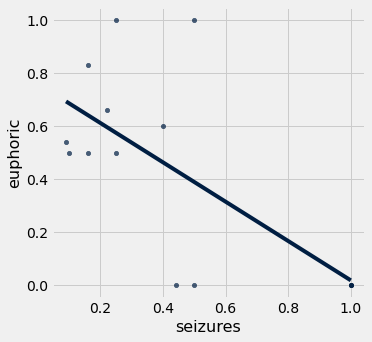

In [72]:
cor_seizures_euphoric = data_with_binary_values.select("name", "euphoric", "seizures").where("seizures", are.not_equal_to(0))
cor_seizures_euphoric.scatter( "seizures","euphoric", fit_line=True)

In [73]:
cor_seizures_euphoric

name,euphoric,seizures
Chili Verde,0.5,0.1
Maui Pineapple Chunk,1,0.25
Marcosus Marshmellow,0.66,0.22
GI001,0,0.44
Southern Lights,0.83,0.16
Gremlin,0.5,0.16
Grandma Anderson’s Cookies,1,0.5
Early Miss,0.5,0.25
Mighty Glue,0.6,0.4
Mud Bite,0,0.5


In [74]:
correlation(cor_seizures_euphoric, "seizures", "euphoric")

-0.6613175591018621

In [75]:
len(data_with_binary_values.where("euphoric", are.not_equal_to(0)).column("name")) / number_of_different_strains

0.4863502729945401

In [76]:
len(cor_seizures_euphoric.where("euphoric", are.not_equal_to(0)) .column(0)) / len(cor_seizures_euphoric.column(0))

0.6428571428571429

In [77]:
# allthough there is a negative corelation between euphoric and seizures
# out of all strains, only around 50% reported to feel ephoric 
# while for the strains reported to help with seizures, 
# almost 65% reported to feel euphoric, so that is reason to add to the weight 
# of ephoric and see results
# innitially ephoric was set to *(-10)
# now im going to try *10

## Bellow Im checking the correlation between seizures and all of the reported side affects to find which ones are the highest and which are lowest. I will use this info to decide how to create my weights. 

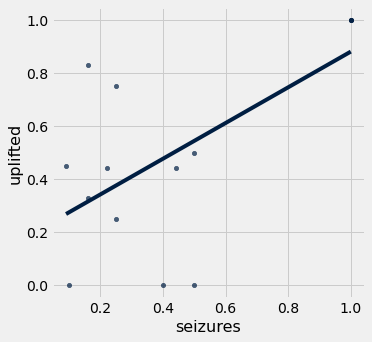

In [78]:
cor_seizures_uplifted = data_with_binary_values.select("name", "uplifted", "seizures").where("seizures", are.not_equal_to(0))
cor_seizures_uplifted.scatter( "seizures","uplifted", fit_line=True)

In [79]:
up_cor = correlation(cor_seizures_uplifted, "seizures", "uplifted")
up_cor

0.6118774320087784

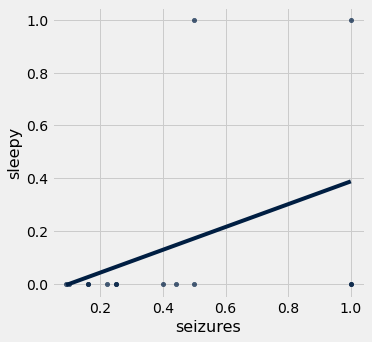

In [80]:
cor_seizures_sleepy = data_with_binary_values.select("name", "sleepy", "seizures").where("seizures", are.not_equal_to(0))
cor_seizures_sleepy.scatter( "seizures","sleepy", fit_line=True)

In [81]:
sleepy_cor = correlation(cor_seizures_sleepy, "seizures", "sleepy")
sleepy_cor

0.3994075020182173

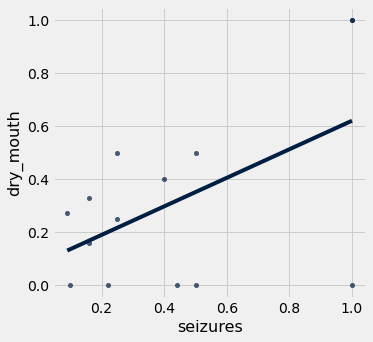

In [82]:
cor_seizures_dry_mouth = data_with_binary_values.select("name", "dry_mouth", "seizures").where("seizures", are.not_equal_to(0))
cor_seizures_dry_mouth.scatter( "seizures","dry_mouth", fit_line=True)

In [83]:
dry_mouth_cor = correlation(cor_seizures_dry_mouth, "seizures", "dry_mouth")
dry_mouth_cor

0.5246805032227498

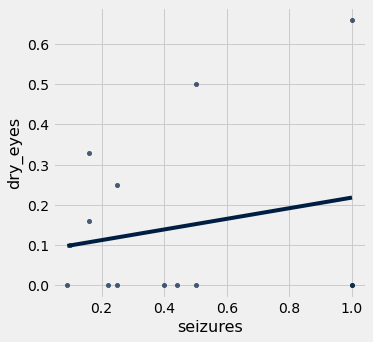

In [84]:
cor_seizures_dry_eyes = data_with_binary_values.select("name", "dry_eyes", "seizures").where("seizures", are.not_equal_to(0))
cor_seizures_dry_eyes.scatter( "seizures","dry_eyes", fit_line=True)

In [85]:
dry_eyes_cor = correlation(cor_seizures_dry_eyes, "seizures", "dry_eyes")
dry_eyes_cor

0.2055210921654115

## Here I have found the R correlation coefiecient between seizures and each different symptom/side effect category

In [86]:
cor_seizures_relaxed = data_with_binary_values.select("name", "relaxed", "seizures").where("seizures", are.not_equal_to(0))
seizures_relaxed = correlation(cor_seizures_relaxed, "seizures", "relaxed")

cor_seizures_happy = data_with_binary_values.select("name", "happy", "seizures").where("seizures", are.not_equal_to(0))
seizures_happy = correlation(cor_seizures_happy, "seizures", "happy")

cor_seizures_euphoric = data_with_binary_values.select("name", "euphoric", "seizures").where("seizures", are.not_equal_to(0))
seizures_euphoric = correlation(cor_seizures_euphoric, "seizures", "euphoric")


cor_seizures_dizzy = data_with_binary_values.select("name", "dizzy", "seizures").where("seizures", are.not_equal_to(0))
seizures_dizzy = correlation(cor_seizures_dizzy, "seizures", "dizzy")

cor_seizures_paranoid = data_with_binary_values.select("name", "paranoid", "seizures").where("seizures", are.not_equal_to(0))
seizures_paranoid = correlation(cor_seizures_paranoid, "seizures", "paranoid")

cor_seizures_anxious = data_with_binary_values.select("name", "anxious", "seizures").where("seizures", are.not_equal_to(0))
seizures_anxious = correlation(cor_seizures_anxious, "seizures", "anxious")

cor_seizures_stress = data_with_binary_values.select("name", "stress", "seizures").where("seizures", are.not_equal_to(0))
seizures_stress = correlation(cor_seizures_stress, "seizures", "stress")

cor_seizures_pain = data_with_binary_values.select("name", "pain", "seizures").where("seizures", are.not_equal_to(0))
seizures_pain = correlation(cor_seizures_pain, "seizures", "pain")

cor_seizures_depression = data_with_binary_values.select("name", "depression", "seizures").where("seizures", are.not_equal_to(0))
seizures_depression = correlation(cor_seizures_depression, "seizures", "depression")

cor_seizures_anxiety = data_with_binary_values.select("name", "anxiety", "seizures").where("seizures", are.not_equal_to(0))
seizures_anxiety = correlation(cor_seizures_anxiety, "seizures", "anxiety")

cor_seizures_insomnia = data_with_binary_values.select("name", "insomnia", "seizures").where("seizures", are.not_equal_to(0))
seizures_insomnia = correlation(cor_seizures_insomnia, "seizures", "insomnia")

cor_seizures_hungry = data_with_binary_values.select("name", "hungry", "seizures").where("seizures", are.not_equal_to(0))
seizures_hungry = correlation(cor_seizures_hungry, "seizures", "hungry")

cor_seizures_talkative = data_with_binary_values.select("name", "talkative", "seizures").where("seizures", are.not_equal_to(0))
seizures_talkative = correlation(cor_seizures_talkative, "seizures", "talkative")

cor_seizures_headache = data_with_binary_values.select("name", "headache", "seizures").where("seizures", are.not_equal_to(0))
seizures_headache = correlation(cor_seizures_headache, "seizures", "headache")

cor_seizures_ptsd = data_with_binary_values.select("name", "ptsd", "seizures").where("seizures", are.not_equal_to(0))
seizures_ptsd = correlation(cor_seizures_ptsd , "seizures", "ptsd")

cor_seizures_creative = data_with_binary_values.select("name", "creative", "seizures").where("seizures", are.not_equal_to(0))
seizures_creative = correlation(cor_seizures_creative  , "seizures", "creative")

cor_seizures_energetic = data_with_binary_values.select("name", "energetic", "seizures").where("seizures", are.not_equal_to(0))
seizures_energetic = correlation(cor_seizures_energetic  , "seizures", "energetic")

cor_seizures_fatigue = data_with_binary_values.select("name", "fatigue", "seizures").where("seizures", are.not_equal_to(0))
seizures_fatigue = correlation(cor_seizures_fatigue  , "seizures", "fatigue")

cor_seizures_focused = data_with_binary_values.select("name", "focused", "seizures").where("seizures", are.not_equal_to(0))
seizures_focused = correlation(cor_seizures_focused  , "seizures", "focused")

cor_seizures_giggly = data_with_binary_values.select("name", "giggly", "seizures").where("seizures", are.not_equal_to(0))
seizures_giggly = correlation(cor_seizures_giggly  , "seizures", "giggly")

cor_seizures_lack_of_appetite = data_with_binary_values.select("name", "lack_of_appetite", "seizures").where("seizures", are.not_equal_to(0))
seizures_lack_of_appetite = correlation(cor_seizures_lack_of_appetite  , "seizures", "lack_of_appetite")

In [87]:
seizures_dizzy, seizures_paranoid, seizures_anxious, seizures_stress, seizures_pain, 
seizures_depression, seizures_anxiety, seizures_insomnia, seizures_hungry, seizures_talkative, 
seizures_headache, seizures_ptsd, seizures_creative, seizures_energetic, seizures_fatigue,
seizures_focused, seizures_giggly, seizures_lack_of_appetite

(0.24675661043277572, -0.07811294449614781, 0.34890589743739847)

In [88]:
correlation_with_seizures_array = make_array(seizures_relaxed, seizures_happy, seizures_euphoric, 
                                             up_cor, sleepy_cor, dry_mouth_cor, dry_eyes_cor,
                                             seizures_dizzy, seizures_paranoid, seizures_anxious, 
                                             seizures_stress, seizures_pain, 
                                             seizures_depression, seizures_anxiety, seizures_insomnia, 
                                             seizures_hungry, seizures_talkative, 
                                             seizures_headache, seizures_ptsd, seizures_creative, 
                                             seizures_energetic, seizures_fatigue,
                                             seizures_focused, seizures_giggly, seizures_lack_of_appetite
                                            )
correlation_with_seizures_array


array([ 0.67907789,  0.83520579, -0.66131756,  0.61187743,  0.3994075 ,
        0.5246805 ,  0.20552109,  0.09666835, -0.33412895,  0.12601525,
        0.6978507 ,  0.70212   ,  0.93229852,  0.44796869,  0.4116113 ,
        0.49444104,  0.38096406,  0.30356563,  0.00551263, -0.30899725,
       -0.12848424,  0.00392312,  0.24675661, -0.07811294,  0.3489059 ])

In [89]:
len(correlation_with_seizures_array)

25

In [90]:
cor_labels = make_array("relaxed","happy","euphoric", "uplifted","sleepy",
                        "dry_mouth", "dry_eyes", "dizzy","paranoid","anxious", "stress",
                        "pain", "depression", "anxiety", "insomnia", "hungry", "talkative",
                        "headache", "ptsd","creative", "energetic", "fatigue", "focused",
                        "giggly", "lack_of_appetite")

len(cor_labels)

25

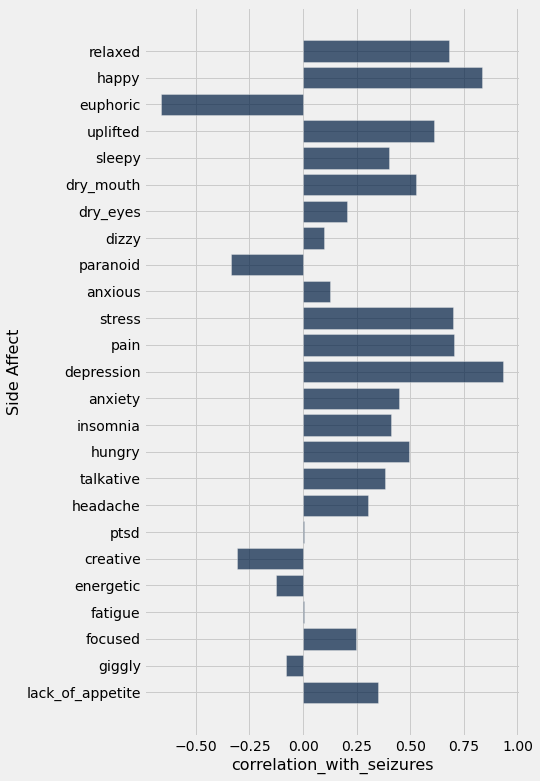

In [91]:
correlation_table = Table().with_columns("Side Affect",cor_labels, "correlation_with_seizures", correlation_with_seizures_array)
correlation_table.barh("Side Affect")

### Using this correlation chart above I can choose which features to weight more heavily. For example, strains that help with depression are highly correlated with those who have report to have help with seizures, therefore I will add more weight to that feature, while creative, and euphoric have highly negative correlation. 

### I should come back to this part, and adjust the weights exactly to how they correlate with seizures rather than just eyeballing it

In [92]:
correlation_with_seizures_array

array([ 0.67907789,  0.83520579, -0.66131756,  0.61187743,  0.3994075 ,
        0.5246805 ,  0.20552109,  0.09666835, -0.33412895,  0.12601525,
        0.6978507 ,  0.70212   ,  0.93229852,  0.44796869,  0.4116113 ,
        0.49444104,  0.38096406,  0.30356563,  0.00551263, -0.30899725,
       -0.12848424,  0.00392312,  0.24675661, -0.07811294,  0.3489059 ])

In [93]:
score_array_for_seizures = (data_with_binary_values.column("relaxed") * (1.67907789) +
                            data_with_binary_values.column("happy") * (1.83520579) +
                            data_with_binary_values.column("euphoric")*(-1.66131756) +
                            data_with_binary_values.column("uplifted")*(1.61187743) +
                            data_with_binary_values.column("sleepy") *(1.3994075) + 
                            data_with_binary_values.column("dry_mouth")*(1.5246805) + 
                            data_with_binary_values.column("dry_eyes") *(1.20552109) + 
                            data_with_binary_values.column("dizzy") *(1.09666835)+
                            data_with_binary_values.column("paranoid") * (-1.33412895) +
                            data_with_binary_values.column("anxious") *(1.12601525)+
                            data_with_binary_values.column("stress") * (1.6978507) +
                            data_with_binary_values.column("pain")*(1.70212) + 
                            data_with_binary_values.column("depression") *(1.93229852) + 
                            data_with_binary_values.column("anxiety") *(1.44796869) + 
                            data_with_binary_values.column("insomnia")*(1.4116113) +
                            data_with_binary_values.column("hungry")*(1.49444104) +
                            data_with_binary_values.column("talkative")*(1.38096406) +
                            data_with_binary_values.column("headache")*(1.30356563) + 
                            data_with_binary_values.column("ptsd")*(1.00551263) + 
                            data_with_binary_values.column("creative")*(-1.30899725) + 
                            data_with_binary_values.column("energetic")*(-1.12848424) +
                            data_with_binary_values.column("fatigue")*(1.00392312) +
                            data_with_binary_values.column("focused")* (1.24675661) + 
                            data_with_binary_values.column("giggly") * (-1.07811294) +
                            data_with_binary_values.column("lack_of_appetite") *(1.3489059)
                           )

In [94]:
score_array_for_seizures

array([4.71933872, 3.67704631, 3.26543501, ..., 3.94219894, 5.59840254,
       4.06838146])

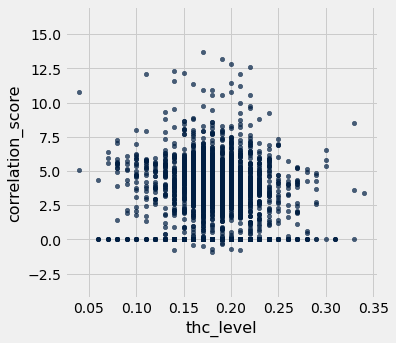

In [95]:
data_with_binary_values_score = data_with_binary_values.with_column("correlation_score", score_array_for_seizures)
data_with_binary_values_score.scatter("thc_level", "correlation_score")

In [96]:
data_with_binary_values_score.where("seizures", are.not_equal_to(0)).select("name", "correlation_score").sort("correlation_score", descending=True)

name,correlation_score
Athabasca,16.0556
Thai Fantasy,15.9396
Face Off Bx2,11.7052
Mud Bite,8.86904
Grandma Anderson’s Cookies,4.67153
Marcosus Marshmellow,2.64963
Early Miss,2.48701
Mighty Glue,2.15922
Chili Verde,1.78411
Gremlin,1.46276


In [97]:
array_for_thc_and_terp = data_with_binary_values.select("thc_level","Indica","Hybrid","Sativa")


In [98]:
dominant_array_for_score = data_with_binary_values.apply(hybrid_dominant_strain_simple, "description")
dominant_array_for_score

array(['NA', 'Indica Dominant', 'NA', ..., 'Indica Dominant',
       'Indica Dominant', 'Indica Dominant'], dtype='<U15')

In [99]:
indica_table_for_seizures = array_for_thc_and_terp.with_column("domiant_strain", dominant_array_for_score)
indica_table_for_seizures.show(5)

thc_level,Indica,Hybrid,Sativa,domiant_strain
0.2,0,1,0,NA
0.22,0,1,0,Indica Dominant
0.19,0,1,0,NA
0.17,0,1,0,NA
0.18,0,1,0,Sativa Dominant


In [100]:
fixed_thc = (indica_table_for_seizures.column("thc_level"))
fixed_thc[fixed_thc == None] = 0
fixed_thc


array([0.2, 0.22, 0.19, ..., 0, 0, 0.27], dtype=object)

In [101]:
# if code fails at this point, what I did is i mutated 
# the thc_level column array to turn all None type values 
# into 0. 
# try doing that again and it should work hopefuly 
indica_table_for_seizures = indica_table_for_seizures.with_column("fixed_thc_level", fixed_thc)
indica_table_for_seizures.show(5)


thc_level,Indica,Hybrid,Sativa,domiant_strain,fixed_thc_level
0.2,0,1,0,NA,0.2
0.22,0,1,0,Indica Dominant,0.22
0.19,0,1,0,NA,0.19
0.17,0,1,0,NA,0.17
0.18,0,1,0,Sativa Dominant,0.18


In [102]:
thc_score_with_types  = (indica_table_for_seizures.column(0) +
                         (indica_table_for_seizures.column(1)) +
                         (indica_table_for_seizures.column(2)) +
                         (indica_table_for_seizures.column(3) * -1) 
                        )
thc_score_with_types


array([1.2, 1.22, 1.19, ..., 1, 1, 1.27], dtype=object)

In [103]:
# data_with_binary_values_score = data_with_binary_values_score.with_column("thc_type_score", thc_score_with_types)
# data_with_binary_values_score.scatter("thc_type_score","score" )
# data_with_binary_values_score.where("thc_level", are.not_equal_to(0)).scatter("thc_type_score","score" )
        
        
    

In [104]:
indica_dominat_array = (indica_table_for_seizures.column("domiant_strain") == "Indica Dominant")

In [105]:
indica_table_for_seizures = indica_table_for_seizures.with_column("Indica Dominant?", indica_dominat_array)
indica_table_for_seizures

thc_level,Indica,Hybrid,Sativa,domiant_strain,fixed_thc_level,Indica Dominant?
0.2,0,1,0,NA,0.2,False
0.22,0,1,0,Indica Dominant,0.22,True
0.19,0,1,0,NA,0.19,False
0.17,0,1,0,NA,0.17,False
0.18,0,1,0,Sativa Dominant,0.18,False
0.19,1,0,0,Indica Dominant,0.19,True
0.2,1,0,0,Indica Dominant,0.2,True
0.19,0,1,0,Indica Dominant,0.19,True
0.18,0,1,0,NA,0.18,False
0.18,0,0,1,Sativa Dominant,0.18,False


In [106]:
highest_recomended_strains_for_seizures.show()

seizures,type,most_common_terpene,name,thc_level,description,dominant_strain
1,Indica,nan,Athabasca,None,Athabasca is a variety of the strain Pennywise grown by ...,NA
1,Hybrid,nan,Thai Fantasy,None,Thai Fantasy by Kannabia Seed Company is a sativa-domina ...,Sativa Dominant
1,Hybrid,nan,Face Off Bx2,None,"A new take on an old classic, Archive Seed Bank’s Face O ...",NA
0.5,Hybrid,Caryophyllene,Grandma Anderson’s Cookies,0.21,"Bred by Humboldt’s Redwood Roots Family, Grandma Anderso ...",Indica Dominant
0.5,Indica,Myrcene,Mud Bite,0.16,There is a very little known about Mud Bite. This strain ...,Indica Dominant
0.44,Hybrid,nan,GI001,None,GI001 is a sativa-dominant cannabis strain developed by ...,Sativa Dominant
0.4,Hybrid,nan,Mighty Glue,None,"Cultivated by The Farm Genetics, Mighty Glue was develop ...",NA
0.25,Hybrid,Myrcene,Maui Pineapple Chunk,0.2,Maui Pineapple Chunk is a 50/50 hybrid bred by Pua Mana ...,NA
0.25,Hybrid,nan,Early Miss,None,"An auto-flowering indica-dominant hybrid, Early Miss is ...",Indica Dominant
0.22,Hybrid,nan,Marcosus Marshmellow,None,Marcosus Marshmellow is a Girl Scout Cookies phenotype g ...,NA


## Bellow are the weights used for the thc type score, which are based off the analysis done on the most common types that helped with seizures, and there thc levels 
### 11/14 strains reported to help with seizures are hybrid 
### 3/5 of the hybrid strains that could be classifed, are reported to be indica dominant

### Based off these findings, I chose to weight thc_scores_and_types strains :
### Indica Dominant Hybird (2)(1.1)
### Hybrid (2)
### Indica (1)
### Sativa(-1)


In [107]:
averaged_data_type.select("type", "seizures average")

type,seizures average
Hybrid,0.00159091
Indica,0.00181818
Sativa,0.000313725


In [108]:
thc_score_with_types  = (indica_table_for_seizures.column(0) +
                         (indica_table_for_seizures.column(1)) +
                         (indica_table_for_seizures.column(2)* 2) +
                         (indica_table_for_seizures.column(3) * -1) +
                         (indica_table_for_seizures.column(6) * 1.1)
                        )
thc_score_with_types

array([2.2, 3.3200000000000003, 2.19, ..., 2.1, 2.1, 2.37], dtype=object)

## This graph bellow is just a test graph to see if I have created some numerical variation through using my weights. 

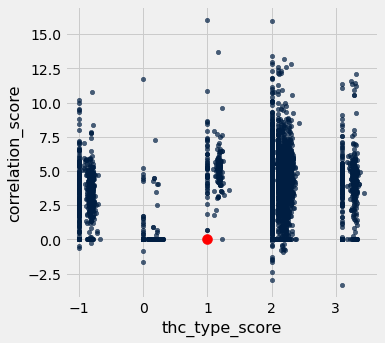

In [109]:
data_with_binary_values_score = data_with_binary_values_score.with_column("thc_type_score", thc_score_with_types)
data_with_binary_values_score.scatter("thc_type_score","correlation_score" )
plots.scatter(1, 0, color='red', s=100);

In [110]:
data_with_binary_values_score.where("seizures", are.not_equal_to(0)).select("name","thc_level", "thc_type_score", "correlation_score", "type").show()

name,thc_level,thc_type_score,correlation_score,type
Chili Verde,0.21,2.21,1.78411,Hybrid
Maui Pineapple Chunk,0.2,2.2,-0.672226,Hybrid
Marcosus Marshmellow,None,2,2.64963,Hybrid
GI001,None,2,1.1671,Hybrid
Southern Lights,0.13,-0.87,1.19971,Sativa
Gremlin,0.15,2.15,1.46276,Hybrid
Grandma Anderson’s Cookies,0.21,3.31,4.67153,Hybrid
Early Miss,None,3.1,2.48701,Hybrid
Mighty Glue,None,2,2.15922,Hybrid
Mud Bite,0.16,2.26,8.86904,Indica


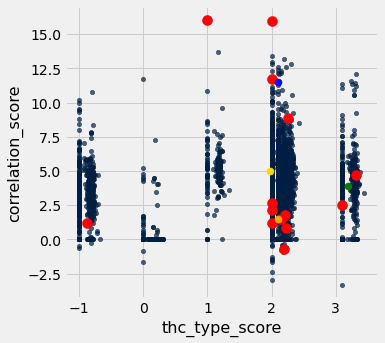

In [111]:
data_with_binary_values_score.scatter("thc_type_score","correlation_score" )
plots.scatter(2.21, 1.78411, color='red', s=100);
plots.scatter(2.2, -0.672226, color='red', s=100);
plots.scatter(2, 2.64963, color='red', s=100);
plots.scatter(2, 1.1671, color='red', s=100);
plots.scatter(-0.87, 1.19971, color='red', s=100);
plots.scatter(2.15, 1.46276, color='red', s=100);
plots.scatter(3.31, 4.67153, color='red', s=100);
plots.scatter(3.1, 2.48701, color='red', s=100);
plots.scatter(2, 2.15922, color='red', s=100);
plots.scatter(2.26, 8.86904, color='red', s=100);
plots.scatter(1, 16.0556, color='red', s=100);
plots.scatter(2, 15.9396, color='red', s=100);
plots.scatter(2.22, 0.826176, color='red', s=100);
plots.scatter(2, 11.7052, color='red', s=100);
plots.scatter(1.97, 5.021745702185713, color='gold', s=50);
plots.scatter(2.1, 1.5, color='orange', s=50);
plots.scatter(2.1, 11.5, color='blue', s=50);
plots.scatter(3.2, 3.9, color='green', s=50);

In [112]:
seizure_center = data_with_binary_values_score.where("seizures", are.not_equal_to(0)).select("name","thc_level", "thc_type_score", "correlation_score", "type")
sum(seizure_center.column("thc_type_score")) / len(seizure_center.column("thc_type_score"))

1.97

In [113]:
sum(seizure_center.column("correlation_score")) / len(seizure_center.column("thc_type_score"))

5.021745702185713

### What this graph shows that 9/14 data points are clustered around THC type score of 2, because the THC type score of 2 is for hybrids, and the data to the right is indica dominat hybrids. 

### The data is mostly clustered around the points of (2.1, 3) which is the orange dot on the graph, where the correlation score posotive and the average THC content is around 18

### The gold dot is the average of all of the red dots. 

In [114]:
# thc type score is a combination of the type as in Hybrid, Sativa, Indica, 
# plus the thc level
# extra weiht if the type is hybrid
# and a heavy weight if the strain is indica dominant hybrid 
# I chose these weights and parameters because of the analysis on 
# strains that helped with siezures. 

# the "score" value represents the sum of all the descriptions as in "happy" "sleepy" etc
# with extra weights added to the symptoms that had the highest correlation with 
# seizures



## Now I use the information from the graph above to find the most similar strains to those that were reported to help with seizures. 

## This table below is looking at the cluster around the orange dot, which is the the most tightly clustered area. 

In [115]:
suggested_strains1 = data_with_binary_values_score.where("thc_type_score", are.strictly_between(1.8,2.5))
suggested_strains1 = suggested_strains1.where("correlation_score", are.strictly_between(.3,2.5))
suggested_strains1 = suggested_strains1.sort("depression",descending=True)
suggested_strains1 = suggested_strains1.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")
suggested_strains1.sort("name")

type,name,thc_level,most_common_terpene,description
Hybrid,'98 Aloha White Widow,None,nan,The ‘98 Aloha White Widow is an especially potent cut of ...
Hybrid,10th Planet,None,nan,Ethos Genetics crossed Planet of the Grapes and the Plut ...
Hybrid,66 Cookies,0.19,Caryophyllene,66 Cookies is a hybrid marijuana strain. We’re still lea ...
Hybrid,805 Glue,None,nan,805 Glue is a hybrid marijuana strain. We’re still learn ...
Hybrid,92 Cookies,None,nan,92 Cookies is a hybrid marijuana strain. We’re still lea ...
Hybrid,AAA OG,None,nan,AAA OG is a hybrid marijuana strain. We’re still learnin ...
Hybrid,Acid,0.16,Myrcene,Acid is Paradise Seeds’ take on the original New York So ...
Indica,Afghan Hawaiian,None,nan,Afghan Hawaiian is an indica-dominant hybrid of UK Chees ...
Hybrid,Afghan Widow,None,nan,Afghan Widow is a strain with deep relaxing qualities th ...
Hybrid,Alien Apparition,0.21,Terpinolene,Alien Apparition is a cleverly named cross from Franchis ...


In [116]:
suggested_strains1.where("name", "Velvet Glove")

type,name,thc_level,most_common_terpene,description


## This table bellow is looking at the strains with higher scores the upper cluster around the blue dot.

In [117]:
suggested_strains2 = data_with_binary_values_score.where("thc_type_score", are.strictly_between(1.8,2.5))
suggested_strains2 = suggested_strains2.where("correlation_score", are.strictly_between(11,12.5))
suggested_strains2 = suggested_strains2.sort("depression",descending=True)
suggested_strains2 = suggested_strains2.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")
suggested_strains2.sort("name").show()

type,name,thc_level,most_common_terpene,description
Hybrid,Bazooka Joe G,0.14,Caryophyllene,"Created by Portland, Oregon’s Archive Seed Bank, Bazooka ..."
Hybrid,Boombaye,None,nan,Boombaye by Mr. Mack’s Snack is a CBD-rich strain that i ...
Hybrid,Bubba Fresh,None,nan,Bubba Fresh by NorStar Genetics is a new take on Pre-98 ...
Indica,CBD OX,None,nan,CBD OX by Rare Dankness is a 1:1 CBD/THC strain that gro ...
Hybrid,Chocolate Lava,None,nan,Chocolate Lava is a rare cannabis strain bred by Aficion ...
Hybrid,Face Off Bx2,None,nan,"A new take on an old classic, Archive Seed Bank’s Face O ..."
Indica,JT15,None,nan,JT15 is an indica Kush cross with a powerful onset and a ...
Indica,Jack Burton,None,nan,Jack Burton by THClones is a sensuous indica-dominant st ...
Hybrid,Lemon Oasis,None,nan,"An homage to the 2005 clone-only Lemon Skunk, Rare Dankn ..."
Hybrid,Neroli 91,0.11,Limonene,"Bred by Bodhi Seeds, Neroli 91 utilizes old school genet ..."


In [118]:
suggested_strains3 = data_with_binary_values_score.where("thc_type_score", are.strictly_between(3,3.2))
suggested_strains3 = suggested_strains3.where("correlation_score", are.strictly_between(1,3))
suggested_strains3 = suggested_strains3.sort("depression",descending=True)
suggested_strains3 = suggested_strains3.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")
suggested_strains3.sort("name").show()

type,name,thc_level,most_common_terpene,description
Hybrid,American Dream,None,nan,American Dream by Sensi Seeds is an indica-dominant stra ...
Hybrid,Animal Sherbert,None,nan,"Bred by Seed Junky, Animal Sherbert crosses Animal Cooki ..."
Hybrid,Blue Nightmare,None,nan,"Blue Nightmare, bred by RNM Flowers, is a resinous, berr ..."
Hybrid,Duke Nukem,None,nan,Duke Nukem may be named after a video game character who ...
Hybrid,Early Miss,None,nan,"An auto-flowering indica-dominant hybrid, Early Miss is ..."
Hybrid,Four Star General,None,nan,Four Star General from Fire Bros. is an indica-dominant ...
Hybrid,Frozen Grapes,None,nan,Frozen Grapes is an indica-dominant hybrid marijuana str ...
Hybrid,Guava Gelato,None,nan,Guava Gelato is a Gelato phenotype from Sherbinkski. Thi ...
Hybrid,Lost Creek,None,nan,"Coming from Rare Dankness Seed Bank, Lost Creek is an in ..."
Hybrid,Loyalty,None,nan,Loyalty is an indica-dominant hybrid bred by TSL Farms i ...


In [119]:
suggested_strains6 = data_with_binary_values_score.where("thc_type_score", are.strictly_between(0.8,1.2))
suggested_strains6 = suggested_strains6.where("correlation_score", are.strictly_between(12,20))
suggested_strains6 = suggested_strains6.sort("depression",descending=True)
suggested_strains6 = suggested_strains6.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")
suggested_strains6.sort("name").show()

type,name,thc_level,most_common_terpene,description
Indica,American Beauty,0.17,nan,American Beauty is a Plushberry x Plushberry cross creat ...
Indica,Athabasca,None,nan,Athabasca is a variety of the strain Pennywise grown by ...


suggested_strains1.group("type")

In [120]:
suggested_strains1.group("most_common_terpene").sort("count", descending=True)

most_common_terpene,count
nan,137
Myrcene,57
Caryophyllene,31
Limonene,25
Terpinolene,22
Pinene,5
Ocimene,2


In [121]:
suggested_thc_array = suggested_strains1.column("thc_level")
suggested_thc_array[suggested_thc_array == None] = 0
suggested_thc_array

array([0, 0.17, 0.19, 0.19, 0.19, 0.18, 0, 0, 0.23, 0, 0, 0.18, 0, 0,
       0.18, 0, 0, 0, 0, 0.22, 0, 0.2, 0.13, 0.22, 0.23, 0, 0, 0, 0.17, 0,
       0.15, 0, 0, 0, 0, 0, 0.15, 0, 0.14, 0, 0.16, 0, 0.17, 0.2, 0.17,
       0.19, 0.22, 0, 0, 0, 0.2, 0, 0, 0.1, 0, 0.21, 0, 0.2, 0.22, 0.19,
       0.16, 0.24, 0, 0.21, 0, 0.26, 0.18, 0.13, 0.17, 0.19, 0, 0.22, 0,
       0, 0, 0, 0, 0.27, 0.24, 0, 0, 0, 0.21, 0, 0.18, 0.21, 0.19, 0.18,
       0.21, 0.17, 0.27, 0.21, 0.24, 0, 0.26, 0.19, 0, 0.18, 0, 0, 0,
       0.25, 0, 0.22, 0.15, 0.24, 0, 0.19, 0, 0.2, 0.17, 0.2, 0, 0.17,
       0.22, 0.21, 0.17, 0.13, 0.17, 0.14, 0.2, 0, 0.27, 0, 0.23, 0, 0.17,
       0.22, 0.21, 0.25, 0, 0, 0, 0, 0, 0.16, 0.21, 0, 0.09, 0, 0.25,
       0.21, 0.16, 0, 0.22, 0.27, 0.22, 0.19, 0, 0.23, 0.2, 0.21, 0.17, 0,
       0, 0, 0, 0.2, 0, 0.18, 0, 0.19, 0.15, 0, 0.18, 0.21, 0, 0, 0, 0,
       0.18, 0, 0, 0.19, 0, 0.15, 0.19, 0.19, 0.17, 0.17, 0.17, 0.22,
       0.19, 0.22, 0, 0.23, 0, 0, 0.15, 0, 0.19, 0.14, 0, 0.1

In [122]:
np.count_nonzero(suggested_thc_array) / len(suggested_thc_array)

0.5448028673835126

In [123]:
suggest_thc_avg = sum(suggested_thc_array) / np.count_nonzero(suggested_thc_array)
suggest_thc_avg

0.1917763157894738

## This value above of 0.1921 is the average THC content for the strains that are similar to those that have been reported to help with seizures. 

In [124]:
seizure_avg_thc_array = data_with_binary_values_score.where("seizures", are.not_equal_to(0)).column("thc_level")
seizure_avg_thc_array[seizure_avg_thc_array == None] = 0
np.count_nonzero(seizure_avg_thc_array)

7

In [125]:
sum(seizure_avg_thc_array) / 7

0.18285714285714286

## This value above of 0.18285 is the average THC content for the strains that have been reported to help with seizures. We can see that the suggest THC and the actual THC conents are simlar. 

In [126]:
data_with_binary_values_score.where("seizures", are.not_equal_to(0)).group("most_common_terpene")

most_common_terpene,count
Caryophyllene,1
Myrcene,3
Terpinolene,2
nan,8


## Below is first the list of strains that have already been reported to help with seizures:

In [127]:
known_to_help_seizures = data_with_binary_values_score.where("seizures", are.not_equal_to(0)).select("name","type","thc_level","description")
known_to_help_seizures.sort("name").show()

name,type,thc_level,description
Athabasca,Indica,None,Athabasca is a variety of the strain Pennywise grown by ...
Chili Verde,Hybrid,0.21,Chili Verde is a hybrid marijuana strain. We’re still le ...
Dreamer’s Glass,Hybrid,0.22,Dreamer’s Glass is a hybrid cannabis strain that deliver ...
Early Miss,Hybrid,None,"An auto-flowering indica-dominant hybrid, Early Miss is ..."
Face Off Bx2,Hybrid,None,"A new take on an old classic, Archive Seed Bank’s Face O ..."
GI001,Hybrid,None,GI001 is a sativa-dominant cannabis strain developed by ...
Grandma Anderson’s Cookies,Hybrid,0.21,"Bred by Humboldt’s Redwood Roots Family, Grandma Anderso ..."
Gremlin,Hybrid,0.15,A cross between King Louis XIII and Mogwai (White Fire A ...
Marcosus Marshmellow,Hybrid,None,Marcosus Marshmellow is a Girl Scout Cookies phenotype g ...
Maui Pineapple Chunk,Hybrid,0.2,Maui Pineapple Chunk is a 50/50 hybrid bred by Pua Mana ...


## Below are 3 lists of strains that have not yet been reported to help, but have the most similar affects according to customer reviews.

In [128]:
suggested_strains1.sort("name").show(5)

type,name,thc_level,most_common_terpene,description
Hybrid,'98 Aloha White Widow,0,nan,The ‘98 Aloha White Widow is an especially potent cut of ...
Hybrid,10th Planet,0,nan,Ethos Genetics crossed Planet of the Grapes and the Plut ...
Hybrid,66 Cookies,0.19,Caryophyllene,66 Cookies is a hybrid marijuana strain. We’re still lea ...
Hybrid,805 Glue,0,nan,805 Glue is a hybrid marijuana strain. We’re still learn ...
Hybrid,92 Cookies,0,nan,92 Cookies is a hybrid marijuana strain. We’re still lea ...


In [129]:
suggested_strains2.sort("name").show(5)

type,name,thc_level,most_common_terpene,description
Hybrid,Bazooka Joe G,0.14,Caryophyllene,"Created by Portland, Oregon’s Archive Seed Bank, Bazooka ..."
Hybrid,Boombaye,None,nan,Boombaye by Mr. Mack’s Snack is a CBD-rich strain that i ...
Hybrid,Bubba Fresh,None,nan,Bubba Fresh by NorStar Genetics is a new take on Pre-98 ...
Indica,CBD OX,None,nan,CBD OX by Rare Dankness is a 1:1 CBD/THC strain that gro ...
Hybrid,Chocolate Lava,None,nan,Chocolate Lava is a rare cannabis strain bred by Aficion ...


In [130]:
suggested_strains3.sort("name").show(5)

type,name,thc_level,most_common_terpene,description
Hybrid,American Dream,None,nan,American Dream by Sensi Seeds is an indica-dominant stra ...
Hybrid,Animal Sherbert,None,nan,"Bred by Seed Junky, Animal Sherbert crosses Animal Cooki ..."
Hybrid,Blue Nightmare,None,nan,"Blue Nightmare, bred by RNM Flowers, is a resinous, berr ..."
Hybrid,Duke Nukem,None,nan,Duke Nukem may be named after a video game character who ...
Hybrid,Early Miss,None,nan,"An auto-flowering indica-dominant hybrid, Early Miss is ..."


## At this point I have found many possible strains, but I want to narrow down my results to be more specific. This could be possible by relating the strains that might help with those that could help with epilepsy and choose the oens that appear in both tables.

In [131]:
# suggested_cbd = data_with_binary_values_score.where("thc_type_score", are.strictly_between(1.8,2.5))
# suggested_cbd = suggested_cbd.where("correlation_score", are.strictly_between(0,3))
# suggested_cbd = suggested_cbd.sort("depression",descending=True)
# suggested_cbd = suggested_cbd.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")
# suggested_cbd.show()

# Below I'm doing the same exact eda and anaylsis on the strains reported to help with epilepsy.

In [132]:
original_epilepsy_table = data_with_binary_values.where("epilepsy", are.not_equal_to(0))
epilepsy_dominant_array = original_epilepsy_table.apply(hybrid_dominant_strain_simple, "description")
original_epilepsy_table = original_epilepsy_table.with_column("dominant", epilepsy_dominant_array)
original_epilepsy_table

name,thc_level,relaxed,happy,euphoric,uplifted,sleepy,dry_mouth,dry_eyes,dizzy,paranoid,anxious,stress,pain,depression,anxiety,insomnia,hungry,talkative,headache,ptsd,creative,energetic,fatigue,focused,giggly,lack_of_appetite,nausea,headaches,bipolar_disorder,cancer,tingly,cramps,aroused,gastrointestinal_disorder,inflammation,muscle_spasms,eye_pressure,migraines,asthma,anorexia,arthritis,add/adhd,muscular_dystrophy,hypertension,glaucoma,pms,seizures,spasticity,spinal_cord_injury,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus,euphoric_int,uplifted_int,img_url,type,most_common_terpene,description,Indica,Sativa,Hybrid,dominant
GI001,None,0,0.44,0,0.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.44,0.55,0.55,0,0.44,0,0,0,0.33,0,0,0,0,0,0,0.55,0,0,0,0,0,0,0,0,0,0,0,0.44,0,0,0,0,0,0.44,0,0,0,0,0,0,0,44,nan,Hybrid,nan,GI001 is a sativa-dominant cannabis strain developed by ...,0,0,1,Sativa Dominant
Gremlin,0.15,0.33,0,0.5,0.33,0,0.33,0.16,0,0.16,0,0,0,0,0.16,0,0.33,0,0,0,0,0,0,0,0,0,0,0.16,0,0,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,0,0,0,0,0,0.33,0,0,0,0,0,0,50,33,nan,Hybrid,nan,A cross between King Louis XIII and Mogwai (White Fire A ...,0,0,1,NA
Early Miss,None,0.5,0,0.5,0.25,0,0.25,0.25,0.25,0,0.25,0,0,0.25,0,0,0,0.25,0.25,0,0.5,0,0,0,0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,0,0,0,0,0,0.25,0,0,0,0,0,0,50,25,nan,Hybrid,nan,"An auto-flowering indica-dominant hybrid, Early Miss is ...",0,0,1,Indica Dominant
Dutch 47,0.19,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0.5,0,0,0,0,0.5,0,0,0,nan,Hybrid,Myrcene,"Bred by Washington’s Trail Blazin’, Dutch 47 is a cross ...",0,0,1,NA
Athabasca,None,1,1,0,1,0,1,0.66,0.33,0,0.33,1,0,1,1,0,0.66,1,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,100,nan,Indica,nan,Athabasca is a variety of the strain Pennywise grown by ...,1,0,0,NA
Mauna Kea White Fire OG,None,1,1,0,0.5,0,0.5,0.5,0,0.5,0,0,0,0,0.5,0.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.5,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,50,nan,Hybrid,nan,"Bred by Pua Mana 1st Hawaiian Pakalolo Seed Bank, Mauna ...",0,0,1,NA
JT15,None,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,100,nan,Indica,nan,JT15 is an indica Kush cross with a powerful onset and a ...,1,0,0,Indica Dominant
Orient Express,0.18,0.66,0.5,0,0.5,0,0.16,0,0,0,0,0,0,0,0.16,0,0.5,0.33,0,0,0,0,0.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,0,0,0,0,0,0,0,0,0.16,0,0,0.16,0,0,0,0,0,0,0,50,nan,Hybrid,nan,Orient Express by Ace Seeds is a sativa-dominant hybrid ...,0,0,1,Sativa Dominant
Diamond Socks,None,0.5,0.5,0,0,0,0,0,0,0,0,0.5,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,nan,Hybrid,nan,"Diamond Socks, named for the dense layer of trichomes co ...",0,0,1,Indica Dominant


In [133]:
original_epilepsy_table.group(["type","dominant"])

type,dominant,count
Hybrid,Indica Dominant,2
Hybrid,NA,3
Hybrid,Sativa Dominant,2
Indica,Indica Dominant,1
Indica,NA,1


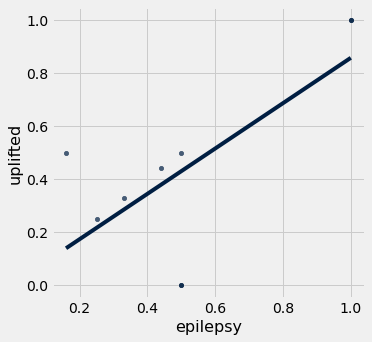

In [134]:
cor_epilepsy_uplifted = original_epilepsy_table.select("name", "uplifted", "epilepsy")
cor_epilepsy_uplifted.scatter( "epilepsy","uplifted", fit_line=True)

In [135]:
epilepsy_uplifted = correlation(cor_epilepsy_uplifted, "epilepsy", "uplifted")
epilepsy_uplifted

0.6953258030735383

In [136]:
cor_epilepsy_relaxed = original_epilepsy_table.select("name", "relaxed", "epilepsy")
epilepsy_relaxed = correlation(cor_epilepsy_relaxed, "epilepsy", "relaxed")
#---------------------------------------------------------------------------------------------
cor_epilepsy_happy = original_epilepsy_table.select("name", "happy", "epilepsy")
epilepsy_happy = correlation(cor_epilepsy_happy, "epilepsy", "happy")
#---------------------------------------------------------------------------------------------
cor_epilepsy_euphoric = original_epilepsy_table.select("name", "euphoric", "epilepsy")
epilepsy_euphoric = correlation(cor_epilepsy_euphoric, "epilepsy", "euphoric")
#---------------------------------------------------------------------------------------------
#uplifted r already found above
#---------------------------------------------------------------------------------------------
cor_epilepsy_sleepy = original_epilepsy_table.select("name", "sleepy", "epilepsy")
epilepsy_sleepy = correlation(cor_epilepsy_sleepy, "epilepsy", "sleepy")
#---------------------------------------------------------------------------------------------
cor_epilepsy_dry_mouth= original_epilepsy_table.select("name", "dry_mouth", "epilepsy")
epilepsy_dry_mouth = correlation(cor_epilepsy_dry_mouth, "epilepsy", "dry_mouth")
#---------------------------------------------------------------------------------------------
cor_epilepsy_dry_eyes = original_epilepsy_table.select("name", "dry_eyes", "epilepsy")
epilepsy_dry_eyes = correlation(cor_epilepsy_dry_eyes, "epilepsy", "dry_eyes")
#---------------------------------------------------------------------------------------------
cor_epilepsy_dizzy = original_epilepsy_table.select("name", "dizzy", "epilepsy")
epilepsy_dizzy = correlation(cor_epilepsy_dizzy, "epilepsy", "dizzy")
#---------------------------------------------------------------------------------------------
cor_epilepsy_paranoid = original_epilepsy_table.select("name", "paranoid", "epilepsy")
epilepsy_paranoid = correlation(cor_epilepsy_paranoid, "epilepsy", "paranoid")
#---------------------------------------------------------------------------------------------
cor_epilepsy_anxious = original_epilepsy_table.select("name", "anxious", "epilepsy")
epilepsy_anxious = correlation(cor_epilepsy_anxious, "epilepsy", "anxious")
#---------------------------------------------------------------------------------------------
cor_epilepsy_stress = original_epilepsy_table.select("name", "stress", "epilepsy")
epilepsy_stress = correlation(cor_epilepsy_stress, "epilepsy", "stress")
#---------------------------------------------------------------------------------------------
cor_epilepsy_pain = original_epilepsy_table.select("name", "pain", "epilepsy")
epilepsy_pain = correlation(cor_epilepsy_pain, "epilepsy", "pain")
#---------------------------------------------------------------------------------------------
cor_epilepsy_depression = original_epilepsy_table.select("name", "depression", "epilepsy")
epilepsy_depression = correlation(cor_epilepsy_depression, "epilepsy", "depression")
#---------------------------------------------------------------------------------------------
cor_epilepsy_anxiety = original_epilepsy_table.select("name", "anxiety", "epilepsy")
epilepsy_anxiety = correlation(cor_epilepsy_anxiety, "epilepsy", "anxiety")
#---------------------------------------------------------------------------------------------
cor_epilepsy_insomnia = original_epilepsy_table.select("name", "insomnia", "epilepsy")
epilepsy_insomnia = correlation(cor_epilepsy_insomnia, "epilepsy", "insomnia")
#---------------------------------------------------------------------------------------------
cor_epilepsy_hungry = original_epilepsy_table.select("name", "hungry", "epilepsy")
epilepsy_hungry = correlation(cor_epilepsy_hungry, "epilepsy", "hungry")
#---------------------------------------------------------------------------------------------
cor_epilepsy_talkative = original_epilepsy_table.select("name", "talkative", "epilepsy")
epilepsy_talkative = correlation(cor_epilepsy_talkative, "epilepsy", "talkative")
#---------------------------------------------------------------------------------------------
cor_epilepsy_headache = original_epilepsy_table.select("name", "headache", "epilepsy")
epilepsy_headache = correlation(cor_epilepsy_headache, "epilepsy", "headache")
#---------------------------------------------------------------------------------------------
cor_epilepsy_ptsd = original_epilepsy_table.select("name", "ptsd", "epilepsy")
epilepsy_ptsd = correlation(cor_epilepsy_ptsd, "epilepsy", "ptsd")
#---------------------------------------------------------------------------------------------
cor_epilepsy_creative = original_epilepsy_table.select("name", "creative", "epilepsy")
epilepsy_creative = correlation(cor_epilepsy_creative, "epilepsy", "creative")
#---------------------------------------------------------------------------------------------
cor_epilepsy_energetic = original_epilepsy_table.select("name", "energetic", "epilepsy")
epilepsy_energetic = correlation(cor_epilepsy_energetic, "epilepsy", "energetic")
#---------------------------------------------------------------------------------------------
cor_epilepsy_fatigue = original_epilepsy_table.select("name", "fatigue", "epilepsy")
epilepsy_fatigue = correlation(cor_epilepsy_fatigue, "epilepsy", "fatigue")
#---------------------------------------------------------------------------------------------
cor_epilepsy_focused = original_epilepsy_table.select("name", "focused", "epilepsy")
epilepsy_focused = correlation(cor_epilepsy_focused, "epilepsy", "focused")
#---------------------------------------------------------------------------------------------
cor_epilepsy_giggly = original_epilepsy_table.select("name", "giggly", "epilepsy")
epilepsy_giggly = correlation(cor_epilepsy_giggly, "epilepsy", "giggly")
#---------------------------------------------------------------------------------------------
cor_epilepsy_lack_of_appetite = original_epilepsy_table.select("name", "lack_of_appetite", "epilepsy")
epilepsy_lack_of_appetite = correlation(cor_epilepsy_lack_of_appetite, "epilepsy", "lack_of_appetite")
#---------------------------------------------------------------------------------------------
cor_epilepsy_nausea = original_epilepsy_table.select("name", "nausea", "epilepsy")
epilepsy_nausea = correlation(cor_epilepsy_nausea, "epilepsy", "nausea")
#---------------------------------------------------------------------------------------------
cor_epilepsy_headaches = original_epilepsy_table.select("name", "headaches", "epilepsy")
epilepsy_headaches = correlation(cor_epilepsy_headaches, "epilepsy", "headaches")
#---------------------------------------------------------------------------------------------

<ipython-input-27-235efbc3e074>:3: RuntimeWarning: invalid value encountered in true_divide
  return (xyz - np.mean(xyz))/np.std(xyz)


In [137]:
correlation_with_epilepsy_array = make_array(epilepsy_relaxed, epilepsy_happy, epilepsy_euphoric,
                                             epilepsy_uplifted, epilepsy_sleepy, epilepsy_dry_mouth,
                                             epilepsy_dry_eyes, epilepsy_dizzy, epilepsy_paranoid, 
                                             epilepsy_anxious, epilepsy_stress, epilepsy_pain, 
                                             epilepsy_depression, epilepsy_anxiety, epilepsy_insomnia,
                                             epilepsy_hungry, epilepsy_talkative, epilepsy_headache, 
                                             epilepsy_ptsd, epilepsy_creative, epilepsy_energetic, 
                                             epilepsy_fatigue, epilepsy_focused, epilepsy_giggly,
                                             epilepsy_lack_of_appetite
                                            )
correlation_with_epilepsy_array

array([ 0.52047154,  0.69337225, -0.4386371 ,  0.6953258 ,  0.60549114,
        0.8368243 ,  0.80346494,  0.29530158, -0.10080162,  0.29530158,
        0.55896955,         nan,  0.52034395,  0.87978809, -0.0252288 ,
        0.62672848,  0.27203445,  0.29530158, -0.10091519, -0.32464528,
       -0.10091519, -0.45411835, -0.10091519,         nan, -0.34058877])

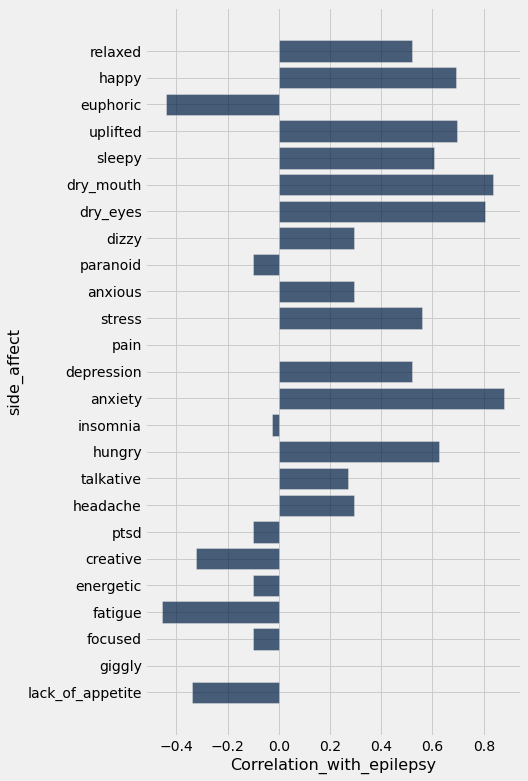

In [138]:
epilepsy_corelation_table = Table().with_columns("side_affect", cor_labels, "Correlation_with_epilepsy", correlation_with_epilepsy_array)
epilepsy_corelation_table.barh("side_affect")

## Here I created weights exactly based on the correlations found above. I hopefuly wont have to go back and change the weights for any reason, unless I add to them, this seems like the best way to choose weights. 

In [139]:
score_array_for_epilepsy = (data_with_binary_values.column("relaxed") * 1.52047154 +
                            data_with_binary_values.column("happy") * 1.69337225 +
                            data_with_binary_values.column("euphoric")*(-1.4386371) +
                            data_with_binary_values.column("uplifted")*(1.6953258) +
                            data_with_binary_values.column("sleepy") *(1.60549114,) + 
                            data_with_binary_values.column("dry_mouth")*(1.8368243) + 
                            data_with_binary_values.column("dry_eyes")*(1.80346494) + 
                            data_with_binary_values.column("dizzy")*(1.29530158,) +
                            data_with_binary_values.column("paranoid") * (-1.10080162)  +
                            data_with_binary_values.column("anxious") * (1.29530158) +
                            data_with_binary_values.column("stress") * (1.55896955) +
                            data_with_binary_values.column("pain") + 
                            data_with_binary_values.column("depression") * (1.52034395) + 
                            data_with_binary_values.column("anxiety") *(1.87978809) + 
                            data_with_binary_values.column("insomnia") * (-1.0252288) +
                            data_with_binary_values.column("hungry") * (1.62672848) +
                            data_with_binary_values.column("talkative") * (1.27203445) +
                            data_with_binary_values.column("headache") * (1.29530158) + 
                            data_with_binary_values.column("ptsd") * (-1.10091519) + 
                            data_with_binary_values.column("creative")*(-1.32464528) + 
                            data_with_binary_values.column("energetic")*( -1.10091519) +
                            data_with_binary_values.column("fatigue") *(-1.45411835)+
                            data_with_binary_values.column("focused")*(-1.10091519) + 
                            data_with_binary_values.column("giggly")  +
                            data_with_binary_values.column("lack_of_appetite") *(-1.34058877)
                           )
score_array_for_epilepsy

array([4.28973044, 3.47864432, 3.0801309 , ..., 3.4943426 , 4.50120881,
       3.97918214])

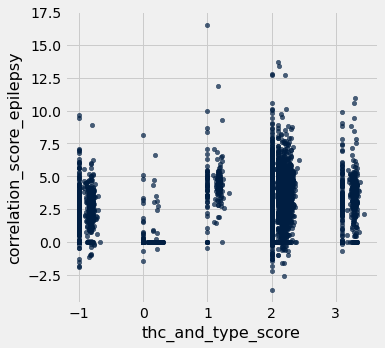

In [140]:
data_with_binary_values_score_epilepsy = data_with_binary_values.with_columns("thc_and_type_score", thc_score_with_types,"correlation_score_epilepsy", score_array_for_epilepsy)

data_with_binary_values_score_epilepsy.scatter("thc_and_type_score", "correlation_score_epilepsy")

In [141]:
eplipsy_score_table_for_scatter = data_with_binary_values_score_epilepsy.where("epilepsy",are.not_equal_to(0)).select("name", "thc_and_type_score","correlation_score_epilepsy" )
eplipsy_score_table_for_scatter

name,thc_and_type_score,correlation_score_epilepsy
GI001,2,-0.811836
Gremlin,2.15,1.89806
Early Miss,3.1,2.04692
Dutch 47,2.19,0.918412
Athabasca,1,16.5234
Mauna Kea White Fire OG,2,7.03056
JT15,2.1,13.6615
Orient Express,2.18,4.29299
Diamond Socks,3.1,3.3263


In [142]:
sum(eplipsy_score_table_for_scatter.drop("name").column("thc_and_type_score")) / 10

1.982

In [143]:
sum(eplipsy_score_table_for_scatter.drop("name").column("correlation_score_epilepsy")) / 10

4.88862897117

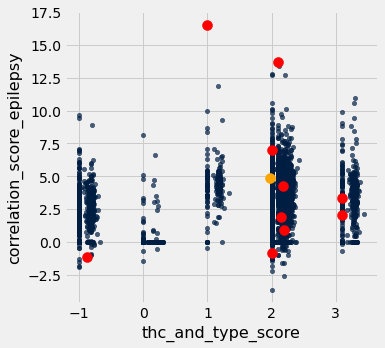

In [144]:
data_with_binary_values_score_epilepsy.scatter("thc_and_type_score","correlation_score_epilepsy" )
plots.scatter(2, -0.811836, color='red', s=100);
plots.scatter(2.15, 1.89806, color='red', s=100);
plots.scatter(3.1, 2.04692, color='red', s=100);
plots.scatter(2.19, 0.918412, color='red', s=100);
plots.scatter(-0.87, -1.13, color='red', s=100);
plots.scatter(1, 16.5234, color='red', s=100);
plots.scatter(2, 7.03056, color='red', s=100);
plots.scatter(2.1, 13.6615, color='red', s=100);
plots.scatter(2.18, 4.29299, color='red', s=100);
plots.scatter(3.1, 3.3263, color='red', s=100);
plots.scatter(1.982, 4.88862897117, color='orange', s=100);

In [145]:
sum(eplipsy_score_table_for_scatter.drop("name").column("correlation_score_epilepsy")) / 10

4.88862897117

In [146]:
eplipsy_score_table_for_scatter.sort("correlation_score_epilepsy", descending=True)

name,thc_and_type_score,correlation_score_epilepsy
Athabasca,1,16.5234
JT15,2.1,13.6615
Mauna Kea White Fire OG,2,7.03056
Orient Express,2.18,4.29299
Diamond Socks,3.1,3.3263
Early Miss,3.1,2.04692
Gremlin,2.15,1.89806
Dutch 47,2.19,0.918412
GI001,2,-0.811836


# This is the part of the code where I am messing around with the clusters I choose. 

In [147]:
suggested_strains4 = data_with_binary_values_score_epilepsy.where("thc_and_type_score", are.strictly_between(1.9,2.5))
suggested_strains4 = suggested_strains4.where("correlation_score_epilepsy", are.strictly_between(-2.5,0))
suggested_strains4 = suggested_strains4.sort("depression",descending=True)
suggested_strains4 = suggested_strains4.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")
suggested_strains4.sort("name")

type,name,thc_level,most_common_terpene,description
Hybrid,Afghan Widow,None,nan,Afghan Widow is a strain with deep relaxing qualities th ...
Hybrid,Alley Cat Kush,0.25,Terpinolene,"Produced by The Bank Cannabis Genetics, Alley Cat Kush i ..."
Indica,Americano,None,nan,Americano is a Canadian strain released by Enterprise Se ...
Hybrid,Atomic Apple,None,nan,Atomic Apple is a hybrid marijuana strain made by crossi ...
Hybrid,Best Friend OG,None,nan,Best Friend OG was bred by Jinxproof Genetics by crossin ...
Hybrid,Blukashima,None,nan,Using a Chernobyl male plant to pollenate their Blue Dre ...
Hybrid,Brian Berry Honey Lemon,None,nan,"Brian Berry Honey Lemon, bred by MzJill Genetics Moser S ..."
Hybrid,Brute Fruit,None,nan,"Inspired by a breeding switch-up done by Bodhi Seeds, Br ..."
Hybrid,Carmel Cough,None,nan,"Bred by Dynasty Genetics, Carmel Cough is a hybrid cross ..."
Hybrid,Chicle,None,nan,Chicle (aka Bubbledawg) by T.H. Seeds is an award-winnin ...


In [148]:
suggested_strains12 = data_with_binary_values_score_epilepsy.where("thc_and_type_score", are.strictly_between(3,5))
suggested_strains12 = suggested_strains12.where("correlation_score_epilepsy", are.strictly_between(2,4))
suggested_strains12 = suggested_strains12.sort("depression",descending=True)
suggested_strains12 = suggested_strains12.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")

suggested_strains13 = data_with_binary_values_score.where("thc_type_score", are.strictly_between(3,5))
suggested_strains13 = suggested_strains13.where("correlation_score", are.strictly_between(2,4))
suggested_strains13 = suggested_strains13.sort("depression",descending=True)
suggested_strains13 = suggested_strains13.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")

In [149]:
def matches():
    results = make_array()
    for each_strain in suggested_strains1.column("name"):
        if (each_strain in suggested_strains4.sort("name").column("name")):
            results = np.append(results,each_strain)
    for each_strain in suggested_strains12.column("name"):
        if (each_strain in suggested_strains13.sort("name").column("name")):
            results = np.append(results,each_strain)
    return results
        
        
matches()

array(['El Fuego', 'Dog Patch', 'City of God', 'OG Purple Fire Thai',
       'Pacific Frost', 'GI001', 'Chicle', 'Carmel Cough',
       'White Bubblegum', 'Afghan Widow', 'Pineapple Muffin', 'Giesel',
       'Dosi White', 'The Forbidden Candy', 'Rawtton', 'Moloka’i Purpz',
       'East Cake', 'Alley Cat Kush', 'Flowers For Algernon',
       'Einstein’s Pipe', 'Americano', 'Cherry Fuel', 'Silver L.A.',
       'Chocolate Rain', 'MILF', 'L.A. Sunshine', 'Soul Shine',
       'Alien Inferno', 'Funfetti', 'Clementine Kush', 'The Grunk',
       'Grape Pie', 'Truffula Tree', 'Alien Reunion',
       'Caramel Candy Kush', 'Big Smooth', 'Hollyweed', "Scout's Honor",
       'Blue Sky', 'Starfighter', 'Gorilla Zkittlez',
       'Black Cherry Cheesecake', 'Green Magic', 'Key Lime Pie',
       'Big Band', 'Kosher Tangie', 'Duke Nukem', 'White Fire Alien OG',
       'Lavender Jones', 'Guava Gelato', 'Predator Pink', 'Dr. Who',
       'OJ Kush', 'Strawberry Banana', 'Pie Face', 'Blueberry Muffin',
    

In [150]:
suggested_strains5 = data_with_binary_values_score_epilepsy.where("thc_and_type_score", are.strictly_between(2,3))
suggested_strains5 = suggested_strains5.where("correlation_score_epilepsy", are.strictly_between(12,14))
suggested_strains5 = suggested_strains5.sort("depression",descending=True)
suggested_strains5 = suggested_strains5.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")
suggested_strains5.sort("name")

type,name,thc_level,most_common_terpene,description
Indica,JT15,None,nan,JT15 is an indica Kush cross with a powerful onset and a ...
Hybrid,Neroli 91,0.11,Limonene,"Bred by Bodhi Seeds, Neroli 91 utilizes old school genet ..."
Hybrid,White Super Skunk,0.21,Myrcene,Super Skunk and The White were crossed by OG Raskal Seed ...


In [151]:
def matche2():
    results2 = make_array()
    for each_strain in suggested_strains2.column("name"):
        if (each_strain in suggested_strains5.sort("name").column("name")):
            results2 = np.append(results2,each_strain)
    for each_strain in suggested_strains3.column("name"):
        if (each_strain in suggested_strains5.sort("name").column("name")):
            results2 = np.append(results2,each_strain)       
    return results2
        
        
matche2()

array(['Neroli 91', 'JT15'], dtype='<U32')

In [152]:
suggested_strains7 = data_with_binary_values_score_epilepsy.where("thc_and_type_score", are.strictly_between(.8,1.2))
suggested_strains7 = suggested_strains7.where("correlation_score_epilepsy", are.strictly_between(12,20))
suggested_strains7 = suggested_strains7.sort("depression",descending=True)
suggested_strains7 = suggested_strains7.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")
suggested_strains7.sort("name")

type,name,thc_level,most_common_terpene,description
Indica,Athabasca,None,nan,Athabasca is a variety of the strain Pennywise grown by ...


In [153]:
neg_suggested = data_with_binary_values_score_epilepsy.where("thc_and_type_score", are.strictly_between(1.9,2.3))
neg_suggested = neg_suggested.where("correlation_score_epilepsy", are.strictly_between(2.5,7.5))
neg_suggested = neg_suggested.sort("depression",descending=True)
neg_suggested = neg_suggested.sort("happy",descending=True).select("type", "name", "thc_level", "most_common_terpene","description")
neg_suggested.sort("name").where("name", "Kush Hemp")

type,name,thc_level,most_common_terpene,description
Hybrid,Kush Hemp,0.14,Terpinolene,"Bred by Sovereign Fields, Kush Hemp is a CBD-dominant st ..."


In [154]:
best_suggestions_array = np.append(matche2(), matches())
best_suggestions_array = np.append(best_suggestions_array, 
                                   eplipsy_score_table_for_scatter.column("name"))
best_suggestions_array = np.append(best_suggestions_array, 
                                   known_to_help_seizures.column("name"))
best_suggestions_array_list = list(best_suggestions_array)
len(best_suggestions_array_list)

122

In [155]:
res = []
[res.append(x) for x in best_suggestions_array_list if x not in res]
best_suggestions_duplicates_removed = res
best_suggestions_duplicates_removed = np.array(best_suggestions_duplicates_removed)

In [156]:
best_suggested_table = data_with_binary_values.where("name", best_suggestions_duplicates_removed)
best_suggested_table = best_suggested_table.select("name", "thc_level",
                                                   "type", "description",
                                                   "most_common_terpene", "seizures"
                                                   
                                                  )
best_suggested_table = best_suggested_table.sort("name")

new_strains_that_help_with_both = np.append(matche2(), matches())
best_suggested_table_new = data_with_binary_values.where("name",new_strains_that_help_with_both)
best_suggested_table_new = best_suggested_table_new.select("name", "thc_level",
                                                   "type", "description",
                                                   "most_common_terpene"
                                                  )
best_suggested_table_new = best_suggested_table_new.sort("name")

/opt/conda/lib/python3.8/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \
/opt/conda/lib/python3.8/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \


# Below is a table of the top 9 most closely related strains to those that helped with seizures and epilepsy, not yet know to help with seizures and epilepsy based user reviews. Below that are the top 14 strains already known to help with seizures and epilepsy: 


In [157]:
best_suggested_table.sort("seizures").show()

name,thc_level,type,description,most_common_terpene,seizures
Afghan Widow,None,Hybrid,Afghan Widow is a strain with deep relaxing qualities th ...,nan,0
Afternoon Delight,0.16,Hybrid,"Afternoon Delight, created by Colorado Seed Inc., is a d ...",Terpinolene,0
Alien Inferno,None,Hybrid,Using a White Fire #6 and Alien OG hybrid and crossing i ...,nan,0
Alien Reunion,None,Hybrid,Alien Reunion is an indica-dominant cross of Alien OG an ...,nan,0
Alley Cat Kush,0.25,Hybrid,"Produced by The Bank Cannabis Genetics, Alley Cat Kush i ...",Terpinolene,0
Americano,None,Indica,Americano is a Canadian strain released by Enterprise Se ...,nan,0
Animal Sherbert,None,Hybrid,"Bred by Seed Junky, Animal Sherbert crosses Animal Cooki ...",nan,0
ArcticBlue,0.2,Hybrid,ArcticBlue is a 60/40 indica-dominant hybrid cannabis st ...,Myrcene,0
Bananas,0.2,Hybrid,Bananas from Leafs by Snoop is an indica-dominant hybrid ...,Myrcene,0
Berry Larry,0.14,Hybrid,Berry Larry by Taste Budz is an indica-leaning phenotype ...,Myrcene,0


In [158]:
best_suggested_table.group("type")

type,count
Hybrid,107
Indica,6
Sativa,1


In [159]:
best_suggested_table.group("most_common_terpene")

most_common_terpene,count
Caryophyllene,13
Limonene,9
Myrcene,29
Pinene,3
Terpinolene,9
nan,51


## Below are the top 5 strains not yet known to help with epilepsy and seizures, but are the most similar to the strains that helped with epilepsy and seizures based off user reviews:

In [160]:
best_suggested_table_new.show()

name,thc_level,type,description,most_common_terpene
Afghan Widow,None,Hybrid,Afghan Widow is a strain with deep relaxing qualities th ...,nan
Afternoon Delight,0.16,Hybrid,"Afternoon Delight, created by Colorado Seed Inc., is a d ...",Terpinolene
Alien Inferno,None,Hybrid,Using a White Fire #6 and Alien OG hybrid and crossing i ...,nan
Alien Reunion,None,Hybrid,Alien Reunion is an indica-dominant cross of Alien OG an ...,nan
Alley Cat Kush,0.25,Hybrid,"Produced by The Bank Cannabis Genetics, Alley Cat Kush i ...",Terpinolene
Americano,None,Indica,Americano is a Canadian strain released by Enterprise Se ...,nan
Animal Sherbert,None,Hybrid,"Bred by Seed Junky, Animal Sherbert crosses Animal Cooki ...",nan
ArcticBlue,0.2,Hybrid,ArcticBlue is a 60/40 indica-dominant hybrid cannabis st ...,Myrcene
Bananas,0.2,Hybrid,Bananas from Leafs by Snoop is an indica-dominant hybrid ...,Myrcene
Berry Larry,0.14,Hybrid,Berry Larry by Taste Budz is an indica-leaning phenotype ...,Myrcene


## Below are the top 9 strains not yet known to help with epilepsy, but are the most similar to the strains that helped with epilepsy based off user reviews:


In [161]:
eplipsy_score_table_for_scatter

name,thc_and_type_score,correlation_score_epilepsy
GI001,2,-0.811836
Gremlin,2.15,1.89806
Early Miss,3.1,2.04692
Dutch 47,2.19,0.918412
Athabasca,1,16.5234
Mauna Kea White Fire OG,2,7.03056
JT15,2.1,13.6615
Orient Express,2.18,4.29299
Diamond Socks,3.1,3.3263


## Below are the top 14 strains already known to help with seizures.

In [162]:
highest_recomended_strains_for_seizures

seizures,type,most_common_terpene,name,thc_level,description,dominant_strain
1,Indica,nan,Athabasca,None,Athabasca is a variety of the strain Pennywise grown by ...,NA
1,Hybrid,nan,Thai Fantasy,None,Thai Fantasy by Kannabia Seed Company is a sativa-domina ...,Sativa Dominant
1,Hybrid,nan,Face Off Bx2,None,"A new take on an old classic, Archive Seed Bank’s Face O ...",NA
0.5,Hybrid,Caryophyllene,Grandma Anderson’s Cookies,0.21,"Bred by Humboldt’s Redwood Roots Family, Grandma Anderso ...",Indica Dominant
0.5,Indica,Myrcene,Mud Bite,0.16,There is a very little known about Mud Bite. This strain ...,Indica Dominant
0.44,Hybrid,nan,GI001,None,GI001 is a sativa-dominant cannabis strain developed by ...,Sativa Dominant
0.4,Hybrid,nan,Mighty Glue,None,"Cultivated by The Farm Genetics, Mighty Glue was develop ...",NA
0.25,Hybrid,Myrcene,Maui Pineapple Chunk,0.2,Maui Pineapple Chunk is a 50/50 hybrid bred by Pua Mana ...,NA
0.25,Hybrid,nan,Early Miss,None,"An auto-flowering indica-dominant hybrid, Early Miss is ...",Indica Dominant
0.22,Hybrid,nan,Marcosus Marshmellow,None,Marcosus Marshmellow is a Girl Scout Cookies phenotype g ...,NA


In [163]:
best_suggested_table.show()

name,thc_level,type,description,most_common_terpene,seizures
Afghan Widow,None,Hybrid,Afghan Widow is a strain with deep relaxing qualities th ...,nan,0
Afternoon Delight,0.16,Hybrid,"Afternoon Delight, created by Colorado Seed Inc., is a d ...",Terpinolene,0
Alien Inferno,None,Hybrid,Using a White Fire #6 and Alien OG hybrid and crossing i ...,nan,0
Alien Reunion,None,Hybrid,Alien Reunion is an indica-dominant cross of Alien OG an ...,nan,0
Alley Cat Kush,0.25,Hybrid,"Produced by The Bank Cannabis Genetics, Alley Cat Kush i ...",Terpinolene,0
Americano,None,Indica,Americano is a Canadian strain released by Enterprise Se ...,nan,0
Animal Sherbert,None,Hybrid,"Bred by Seed Junky, Animal Sherbert crosses Animal Cooki ...",nan,0
ArcticBlue,0.2,Hybrid,ArcticBlue is a 60/40 indica-dominant hybrid cannabis st ...,Myrcene,0
Athabasca,None,Indica,Athabasca is a variety of the strain Pennywise grown by ...,nan,1
Bananas,0.2,Hybrid,Bananas from Leafs by Snoop is an indica-dominant hybrid ...,Myrcene,0


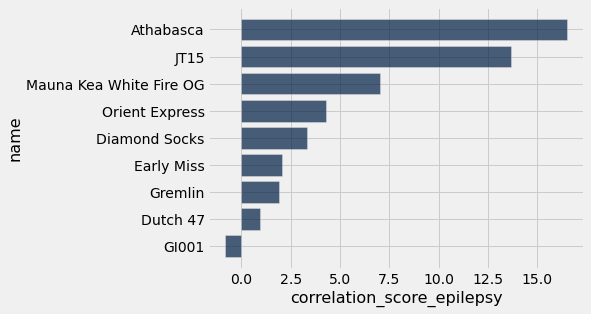

In [164]:
top_ranked_for_epilepsy = eplipsy_score_table_for_scatter.sort("correlation_score_epilepsy", descending=True).barh("name", "correlation_score_epilepsy")
top_ranked_for_epilepsy

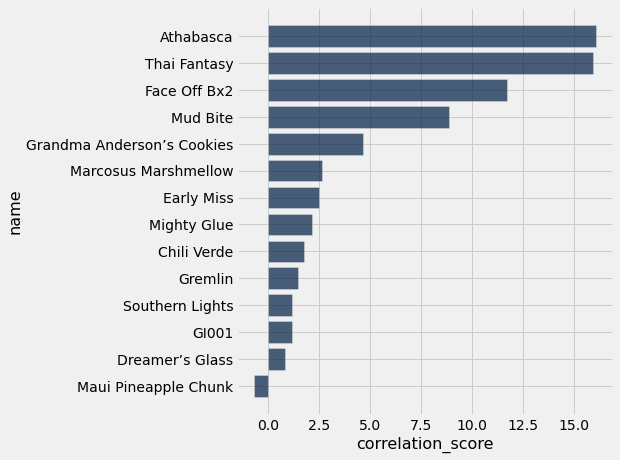

In [165]:
top_ranked_for_seizures = data_with_binary_values_score.where("seizures", are.not_equal_to(0)).select("name","thc_level", "thc_type_score", "correlation_score", "type")
top_ranked_for_seizures.sort("correlation_score",descending=True).barh("name", "correlation_score")

In [166]:
# data_with_binary_values_score_epilepsy.scatter("thc_and_type_score","correlation_score_epilepsy" )
# plots.scatter(1, 16.5234, color='red', s=100);
# data_with_binary_values_score.scatter("thc_type_score","correlation_score" )

# plots.scatter(1, 16.0556, color='red', s=100);
best_suggested_table.where("name","JT15").column("description")

array(['JT15 is an indica Kush cross with a powerful onset and a deep, earthy, woody aroma. Its relaxing qualities make JT15 a preferred strain for patients treating pain, insomnia, and stress.'],
      dtype='<U1132')

In [167]:
seizure_cor_score_array = data_with_binary_values_score.column("correlation_score")
seizure_thc_type_array_score = data_with_binary_values_score.column("thc_type_score")

In [168]:
complete_names = best_suggested_table.column("name")

In [169]:
complete_data_table = data_with_binary_values_score_epilepsy.with_columns("seizure_correlation_score", seizure_cor_score_array, "seizures_thc_type_score",seizure_thc_type_array_score )
complete_data_table = complete_data_table.select("name","thc_level", "seizures", 
                                                 "epilepsy","thc_and_type_score","correlation_score_epilepsy",
                                                 "seizures_thc_type_score","seizure_correlation_score",
                                                 "most_common_terpene", "Sativa", "Indica", "Hybrid"
                                                
                                                )

complete_data_table = complete_data_table.where("name", complete_names)
complete_data_table = complete_data_table.sort("seizures").sort("seizures",descending=True)
complete_data_table

/opt/conda/lib/python3.8/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \


name,thc_level,seizures,epilepsy,thc_and_type_score,correlation_score_epilepsy,seizures_thc_type_score,seizure_correlation_score,most_common_terpene,Sativa,Indica,Hybrid
Athabasca,None,1,1,1,16.5234,1,16.0556,nan,0,1,0
Thai Fantasy,None,1,0,2,10.1327,2,15.9396,nan,0,0,1
Face Off Bx2,None,1,0,2,7.88757,2,11.7052,nan,0,0,1
Grandma Anderson’s Cookies,0.21,0.5,0,3.31,0.66259,3.31,4.67153,Caryophyllene,0,0,1
Mud Bite,0.16,0.5,0,2.26,8.78671,2.26,8.86904,Myrcene,0,1,0
GI001,None,0.44,0.44,2,-0.811836,2,1.1671,nan,0,0,1
Mighty Glue,None,0.4,0,2,3.74057,2,2.15922,nan,0,0,1
Maui Pineapple Chunk,0.2,0.25,0,2.2,-1.61043,2.2,-0.672226,Myrcene,0,0,1
Early Miss,None,0.25,0.25,3.1,2.04692,3.1,2.48701,nan,0,0,1
Marcosus Marshmellow,None,0.22,0,2,2.10043,2,2.64963,nan,0,0,1


In [170]:
sample_size = complete_data_table.where("thc_level", are.not_equal_to(None)).column(0)
sample_size = len(sample_size)

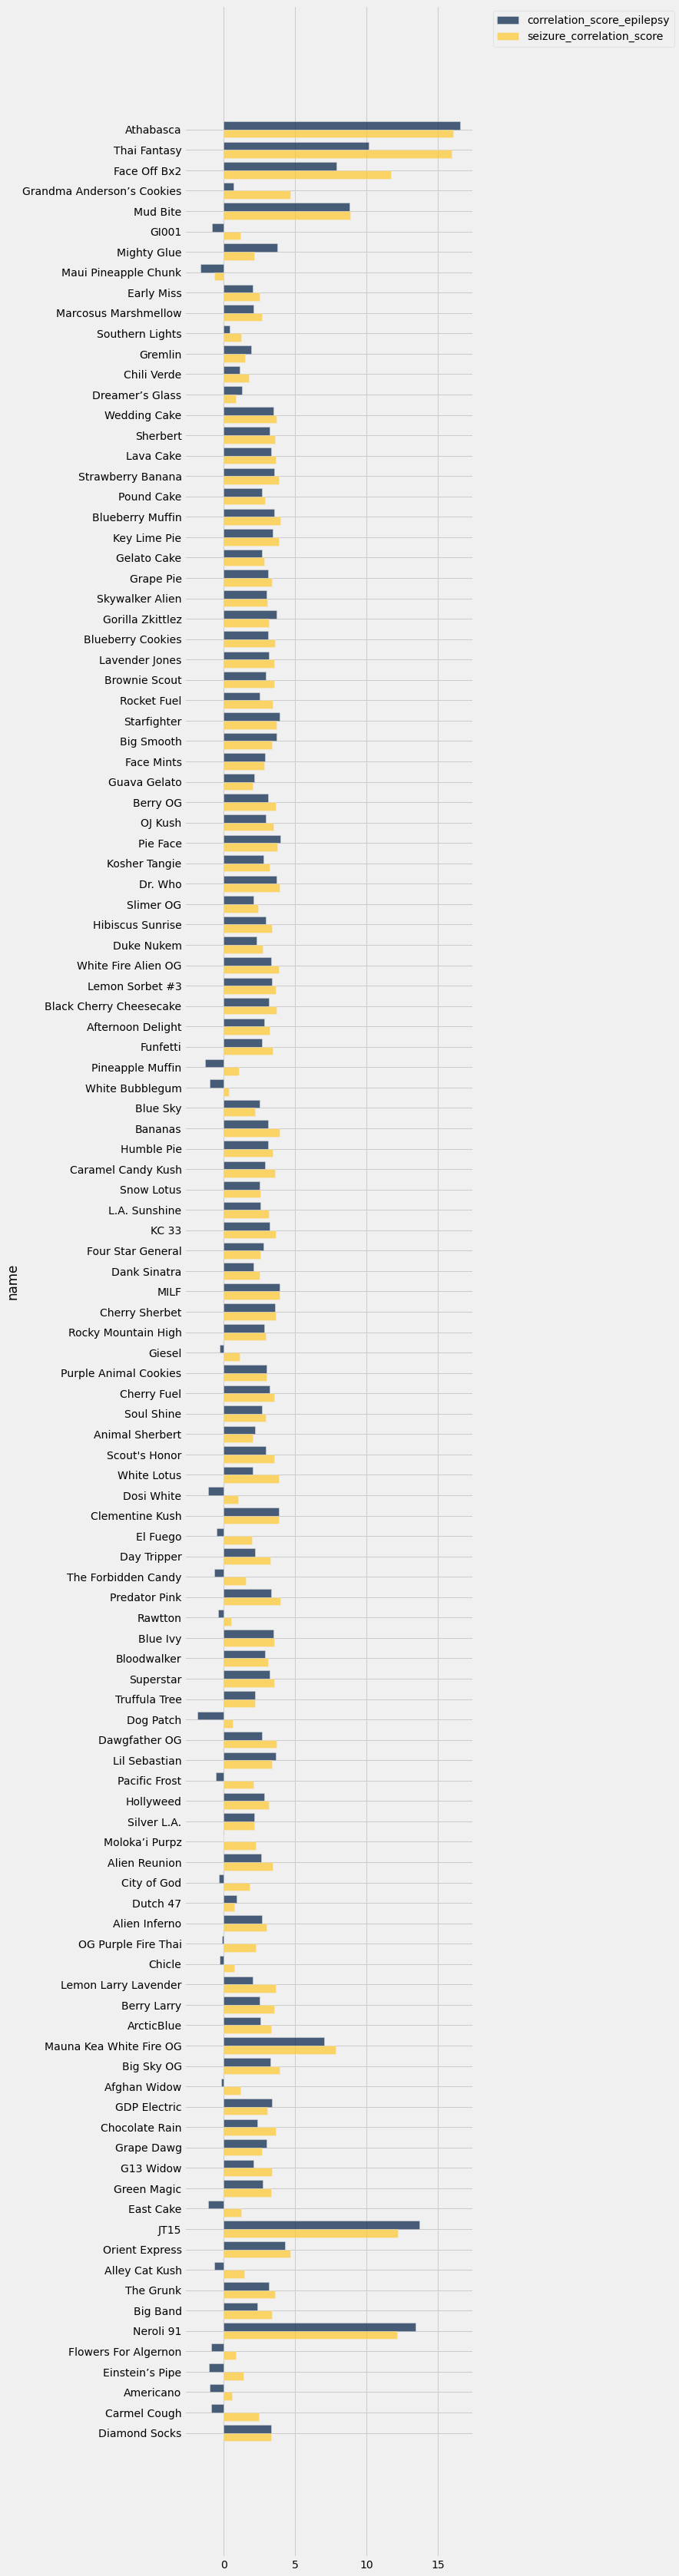

In [171]:
complete_data_table.select("name", "correlation_score_epilepsy", "seizure_correlation_score").barh("name")

In [172]:
# complete_data_table.select("name","thc_level").where("thc_level", are.not_equal_to(None)).barh("name")

In [173]:
sum(complete_data_table.where("thc_level", are.not_equal_to(None)).column("thc_level"))/ sample_size

0.1877941176470588

In [174]:
complete_data_table.group("most_common_terpene")

most_common_terpene,count
Caryophyllene,13
Limonene,9
Myrcene,29
Pinene,3
Terpinolene,9
nan,51


## Here are 85 suggested strains that are correlated with seizures and eplipsy, but have not yet been reported to help with seizures or epliepsy. 

In [175]:
complete_data_table.where("seizures", 0).where("epilepsy", 0).sort("seizures").show()

name,thc_level,seizures,epilepsy,thc_and_type_score,correlation_score_epilepsy,seizures_thc_type_score,seizure_correlation_score,most_common_terpene,Sativa,Indica,Hybrid
Wedding Cake,0.22,0,0,3.32,3.47864,3.32,3.67705,Limonene,0,0,1
Sherbert,0.18,0,0,3.28,3.21511,3.28,3.56898,Caryophyllene,0,0,1
Lava Cake,0.17,0,0,3.27,3.34206,3.27,3.6428,Caryophyllene,0,0,1
Strawberry Banana,0.21,0,0,3.31,3.55049,3.31,3.84182,Limonene,0,0,1
Pound Cake,0.17,0,0,3.27,2.6587,3.27,2.87996,Myrcene,0,0,1
Blueberry Muffin,0.18,0,0,3.28,3.54697,3.28,3.96669,Caryophyllene,0,0,1
Key Lime Pie,0.18,0,0,3.28,3.41117,3.28,3.83716,Caryophyllene,0,0,1
Gelato Cake,0.21,0,0,3.31,2.67078,3.31,2.80873,Limonene,0,0,1
Grape Pie,0.21,0,0,3.31,3.10694,3.31,3.36315,Myrcene,0,0,1
Skywalker Alien,None,0,0,3.1,3.0108,3.1,3.07279,nan,0,0,1


## Below are the strains with the highest corelation scores for strains that help with seizures that have not yet been reported to help with seizures.

In [176]:
complete_data_table_not_filtered = data_with_binary_values_score_epilepsy.with_columns("seizure_correlation_score", seizure_cor_score_array, "seizures_thc_type_score",seizure_thc_type_array_score )
complete_data_table_not_filtered = complete_data_table_not_filtered.select("name","thc_level", "seizures", 
                                                 "epilepsy","thc_and_type_score","correlation_score_epilepsy",
                                                 "seizures_thc_type_score","seizure_correlation_score",
                                                 "most_common_terpene", "Sativa", "Indica", "Hybrid"
                                                
                                                )


complete_data_table_not_filtered.sort("seizure_correlation_score",descending=True).take(np.arange(25)).where("seizures", 0).where("epilepsy", 0).show()

name,thc_level,seizures,epilepsy,thc_and_type_score,correlation_score_epilepsy,seizures_thc_type_score,seizure_correlation_score,most_common_terpene,Sativa,Indica,Hybrid
American Beauty,0.17,0,0,1.17,11.8479,1.17,13.6864,nan,0,1,0
Pan Jam,None,0,0,2,7.82887,2,13.4127,nan,0,0,1
IG Kush,0.19,0,0,2.19,7.646,2.19,13.1865,Caryophyllene,0,0,1
Holy Punch,None,0,0,2,6.45606,2,12.9386,nan,0,0,1
Apollo 13 Haze,None,0,0,2,8.6046,2,12.7905,nan,0,0,1
Afghanimal,0.2,0,0,2.3,8.56214,2.3,12.7896,Myrcene,0,1,0
River Song,0.22,0,0,2.22,7.70462,2.22,12.6268,Limonene,0,0,1
Allen Iverson OG,None,0,0,2.1,6.11254,2.1,12.5837,nan,0,1,0
Jack Burton,None,0,0,2.1,8.88958,2.1,12.3596,nan,0,1,0
Chocolate Lava,None,0,0,2,10.0107,2,12.2918,nan,0,0,1


In [177]:
complete_data_table_not_filtered.where("name", are.containing("707"))

name,thc_level,seizures,epilepsy,thc_and_type_score,correlation_score_epilepsy,seizures_thc_type_score,seizure_correlation_score,most_common_terpene,Sativa,Indica,Hybrid
707,0.16,0,0,2.16,3.90351,2.16,3.9448,Myrcene,0,0,1
707 Truthband,0.18,0,0,2.18,2.5164,2.18,6.51748,Limonene,0,0,1


In [178]:
names = list(complete_data_table.column("name"))
# names

In [179]:
all_names = list(complete_data_table_not_filtered.column("name"))

def find_similar_names():
    name_list = make_array()
    for i in range(len(all_names)):
        each_name = all_names[i].replace(" ", "")
        each_name = all_names[i].lower()
        for every_name in all_names:
            if (each_name in every_name.lower()):
                name_list = np.append(name_list,every_name) 
    return name_list

# names[5].lower().replace(" ", "")
important_names_and_related = (np.append(names,find_similar_names()))
remove_duplicates = list(important_names_and_related)
res2 = []
[res2.append(x) for x in remove_duplicates if x not in res2]
cleaned = np.array(res2)

In [180]:
# complete_data_table_not_filtered.where("name", cleaned).sort("name",descending=True).show()

In [181]:
face_off_table = complete_data_table_not_filtered.where("name", are.containing("Face Off"))
face_off_table

name,thc_level,seizures,epilepsy,thc_and_type_score,correlation_score_epilepsy,seizures_thc_type_score,seizure_correlation_score,most_common_terpene,Sativa,Indica,Hybrid
Face Off OG,0.19,0,0,2.29,4.69482,2.29,5.39781,Myrcene,0,1,0
Face Off OG Bx1,None,0,0,2,-0.220058,2,5.16958,nan,0,0,1
Face Off Bx2,None,1,0,2,7.88757,2,11.7052,nan,0,0,1


In [182]:
"face off" in "Face Off OG"

False

# Findings: 

### Hybrid strains are the most common to help with siezures and eplispsy symptoms. 

### The avereage THC content is 18.7% for strains that help with seizures and epilepsy. 

### Most common terpene in strains that were reported to help with seizures and strains that are similar to those based off user reviews are Myrcene and Terpinolene.

### There is only 1 Sativa dominant hybrid, in the top rated 14 strains that are known to help for both seizures and epilepsy which was GI001; however, GI001 has a 24:1 CBD to THC ratio, making it also a CBD dominant strain. 

### The strain Athabasca appeared at the top of both tables in terms of corelation between side affects and helping with seizures and epilepsy.  

### The top 2 strains related to Athabasca, that not are not yet known to help with seizures or epilpsy are  are 'Neroli 91', and 'JT15'. 'Neroli 91' is a Hybrid and 'JT15' is an Indica. 

In [183]:
final_table = complete_data_table.where("seizures", are.not_equal_to(0))
final_table.show()

name,thc_level,seizures,epilepsy,thc_and_type_score,correlation_score_epilepsy,seizures_thc_type_score,seizure_correlation_score,most_common_terpene,Sativa,Indica,Hybrid
Athabasca,None,1,1,1,16.5234,1,16.0556,nan,0,1,0
Thai Fantasy,None,1,0,2,10.1327,2,15.9396,nan,0,0,1
Face Off Bx2,None,1,0,2,7.88757,2,11.7052,nan,0,0,1
Grandma Anderson’s Cookies,0.21,0.5,0,3.31,0.66259,3.31,4.67153,Caryophyllene,0,0,1
Mud Bite,0.16,0.5,0,2.26,8.78671,2.26,8.86904,Myrcene,0,1,0
GI001,None,0.44,0.44,2,-0.811836,2,1.1671,nan,0,0,1
Mighty Glue,None,0.4,0,2,3.74057,2,2.15922,nan,0,0,1
Maui Pineapple Chunk,0.2,0.25,0,2.2,-1.61043,2.2,-0.672226,Myrcene,0,0,1
Early Miss,None,0.25,0.25,3.1,2.04692,3.1,2.48701,nan,0,0,1
Marcosus Marshmellow,None,0.22,0,2,2.10043,2,2.64963,nan,0,0,1


In [184]:
face_off_table

name,thc_level,seizures,epilepsy,thc_and_type_score,correlation_score_epilepsy,seizures_thc_type_score,seizure_correlation_score,most_common_terpene,Sativa,Indica,Hybrid
Face Off OG,0.19,0,0,2.29,4.69482,2.29,5.39781,Myrcene,0,1,0
Face Off OG Bx1,None,0,0,2,-0.220058,2,5.16958,nan,0,0,1
Face Off Bx2,None,1,0,2,7.88757,2,11.7052,nan,0,0,1


In [186]:
complete_data_table

name,thc_level,seizures,epilepsy,thc_and_type_score,correlation_score_epilepsy,seizures_thc_type_score,seizure_correlation_score,most_common_terpene,Sativa,Indica,Hybrid
Athabasca,None,1,1,1,16.5234,1,16.0556,nan,0,1,0
Thai Fantasy,None,1,0,2,10.1327,2,15.9396,nan,0,0,1
Face Off Bx2,None,1,0,2,7.88757,2,11.7052,nan,0,0,1
Grandma Anderson’s Cookies,0.21,0.5,0,3.31,0.66259,3.31,4.67153,Caryophyllene,0,0,1
Mud Bite,0.16,0.5,0,2.26,8.78671,2.26,8.86904,Myrcene,0,1,0
GI001,None,0.44,0.44,2,-0.811836,2,1.1671,nan,0,0,1
Mighty Glue,None,0.4,0,2,3.74057,2,2.15922,nan,0,0,1
Maui Pineapple Chunk,0.2,0.25,0,2.2,-1.61043,2.2,-0.672226,Myrcene,0,0,1
Early Miss,None,0.25,0.25,3.1,2.04692,3.1,2.48701,nan,0,0,1
Marcosus Marshmellow,None,0.22,0,2,2.10043,2,2.64963,nan,0,0,1
